In [1]:
import warnings
warnings.filterwarnings("ignore")

[*********************100%***********************]  1 of 1 completed


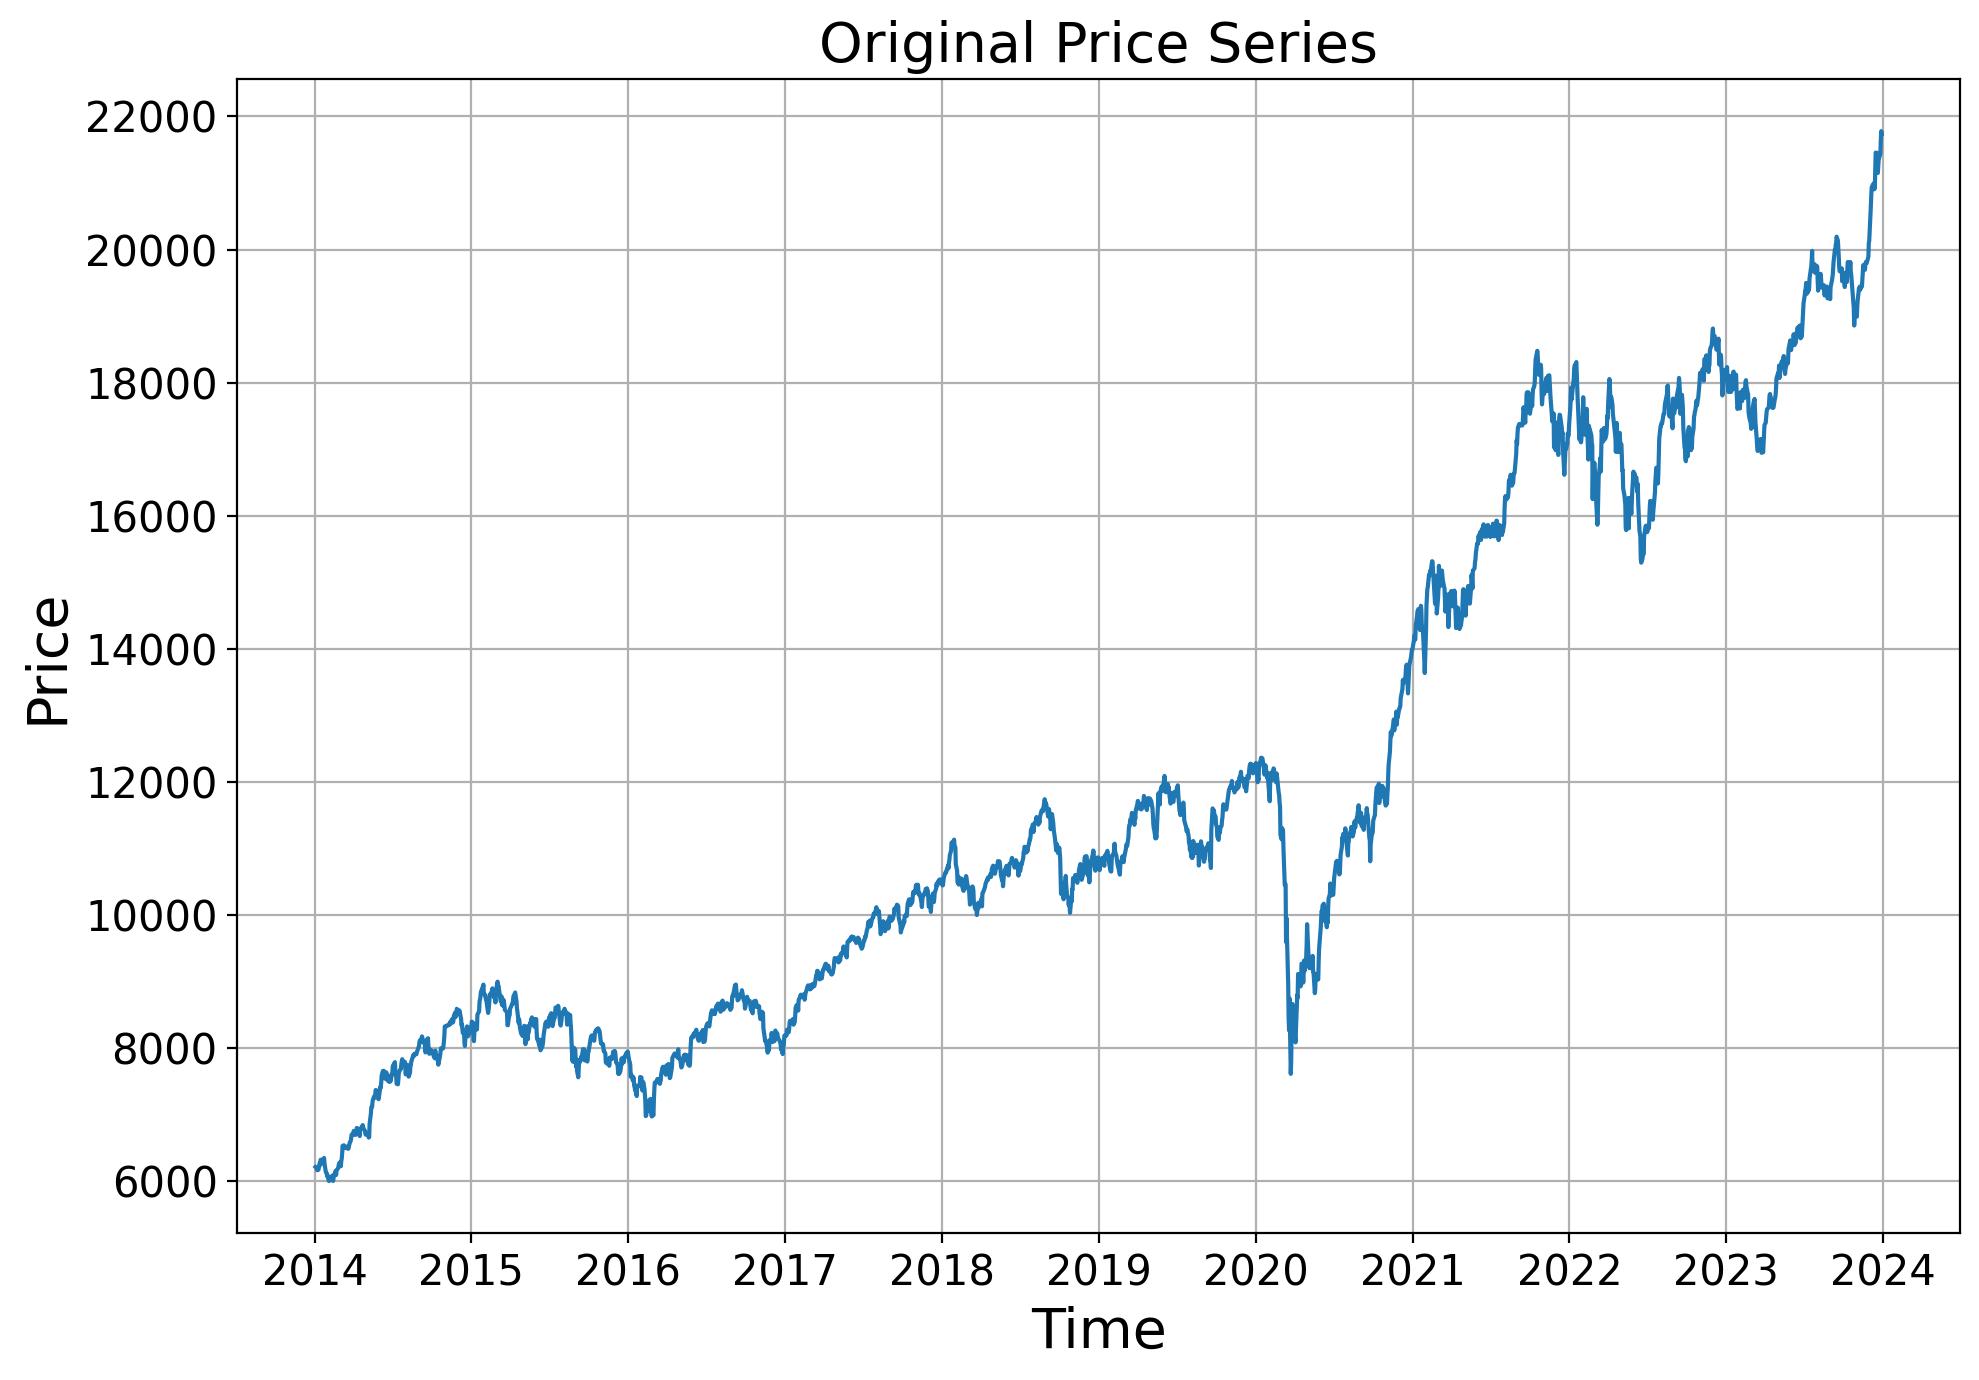

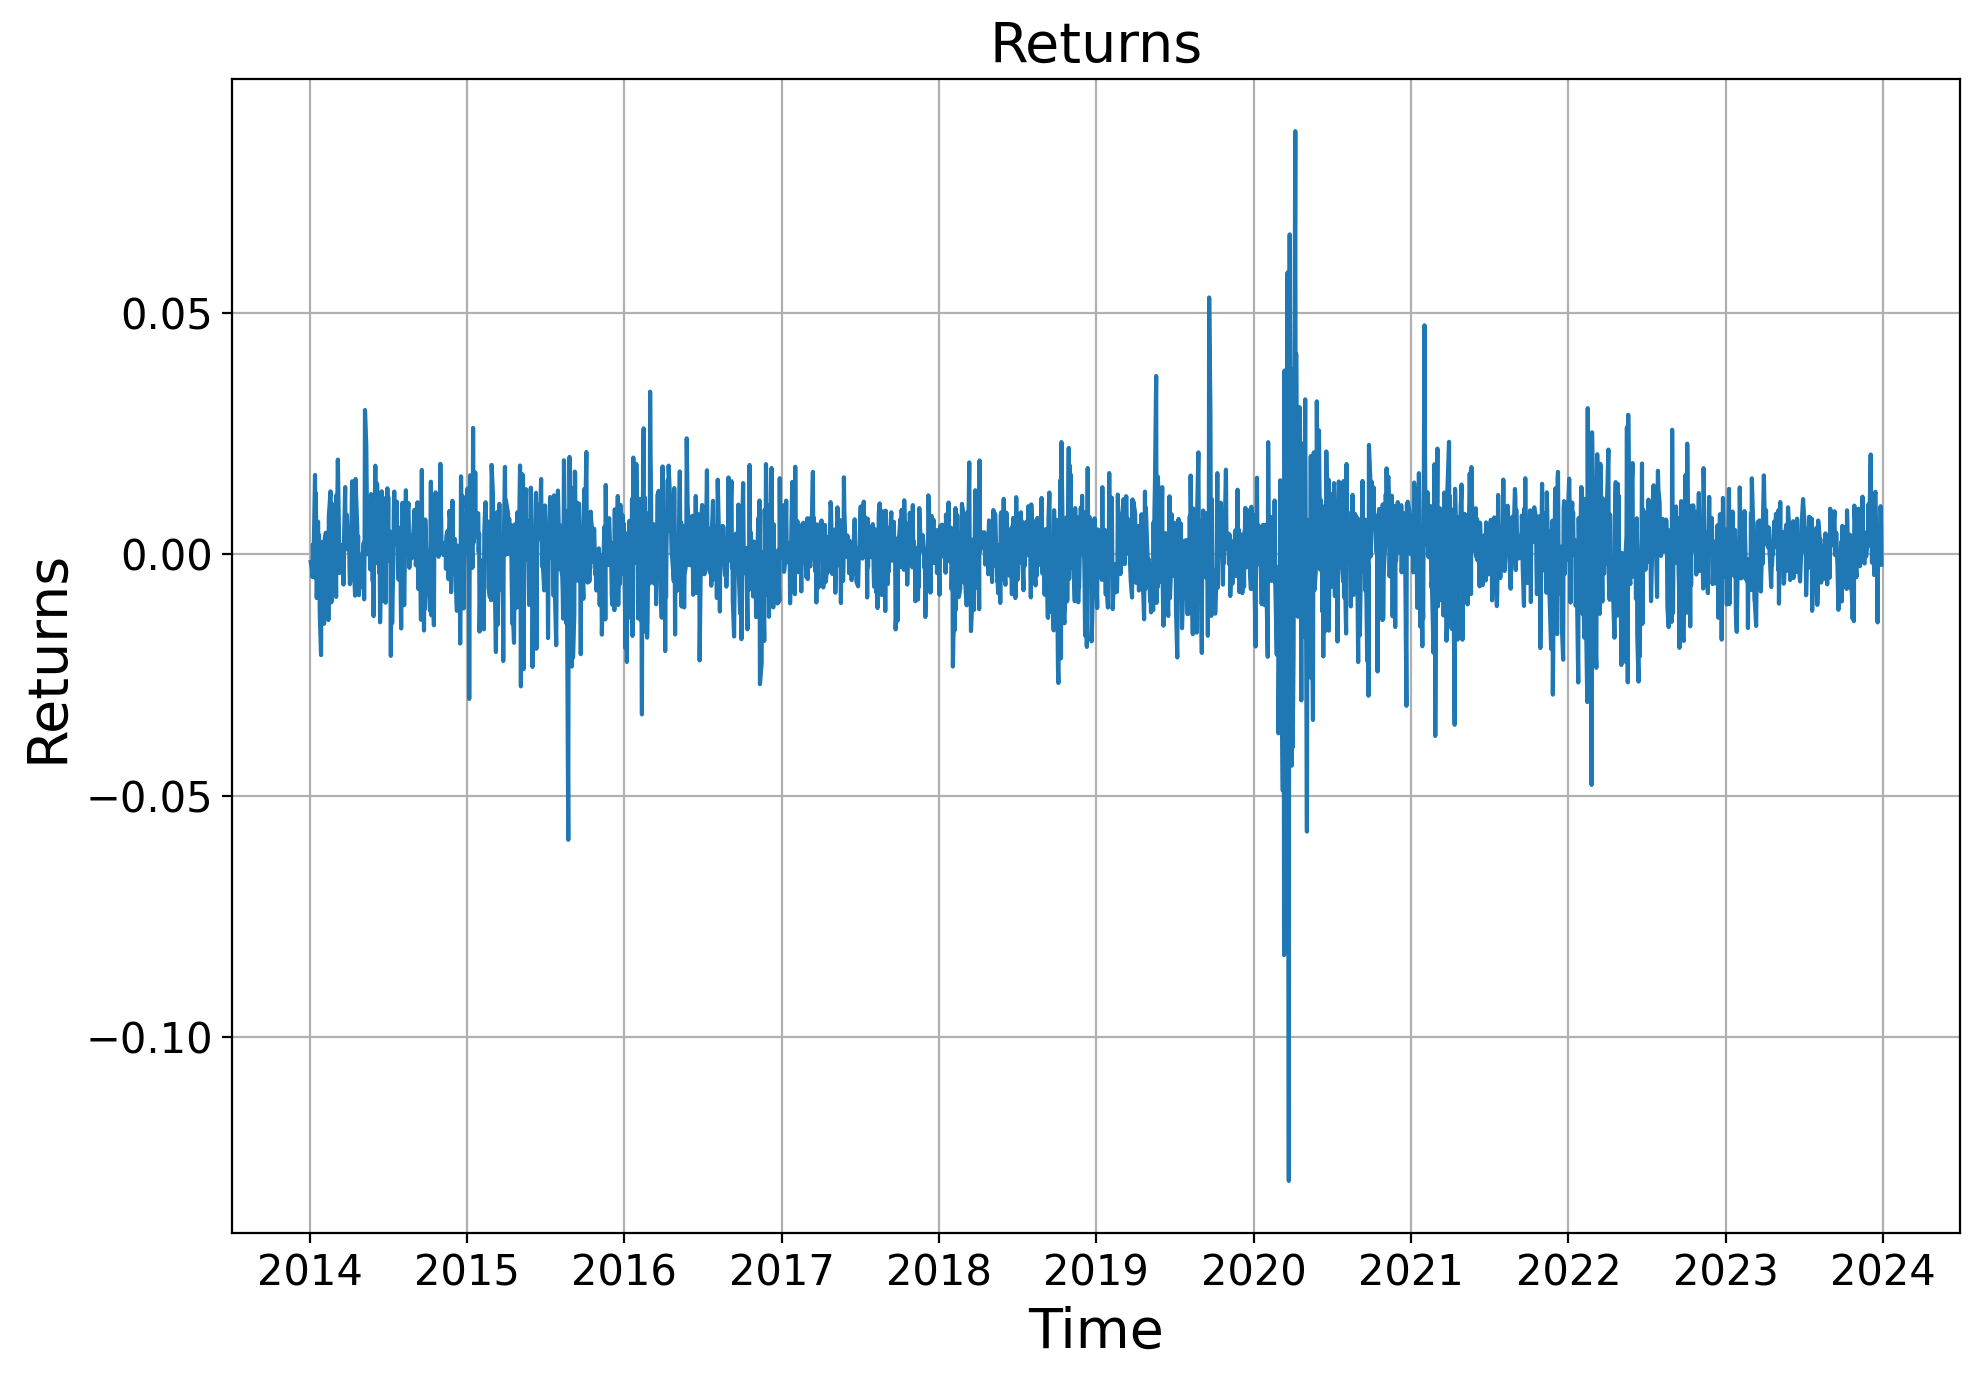

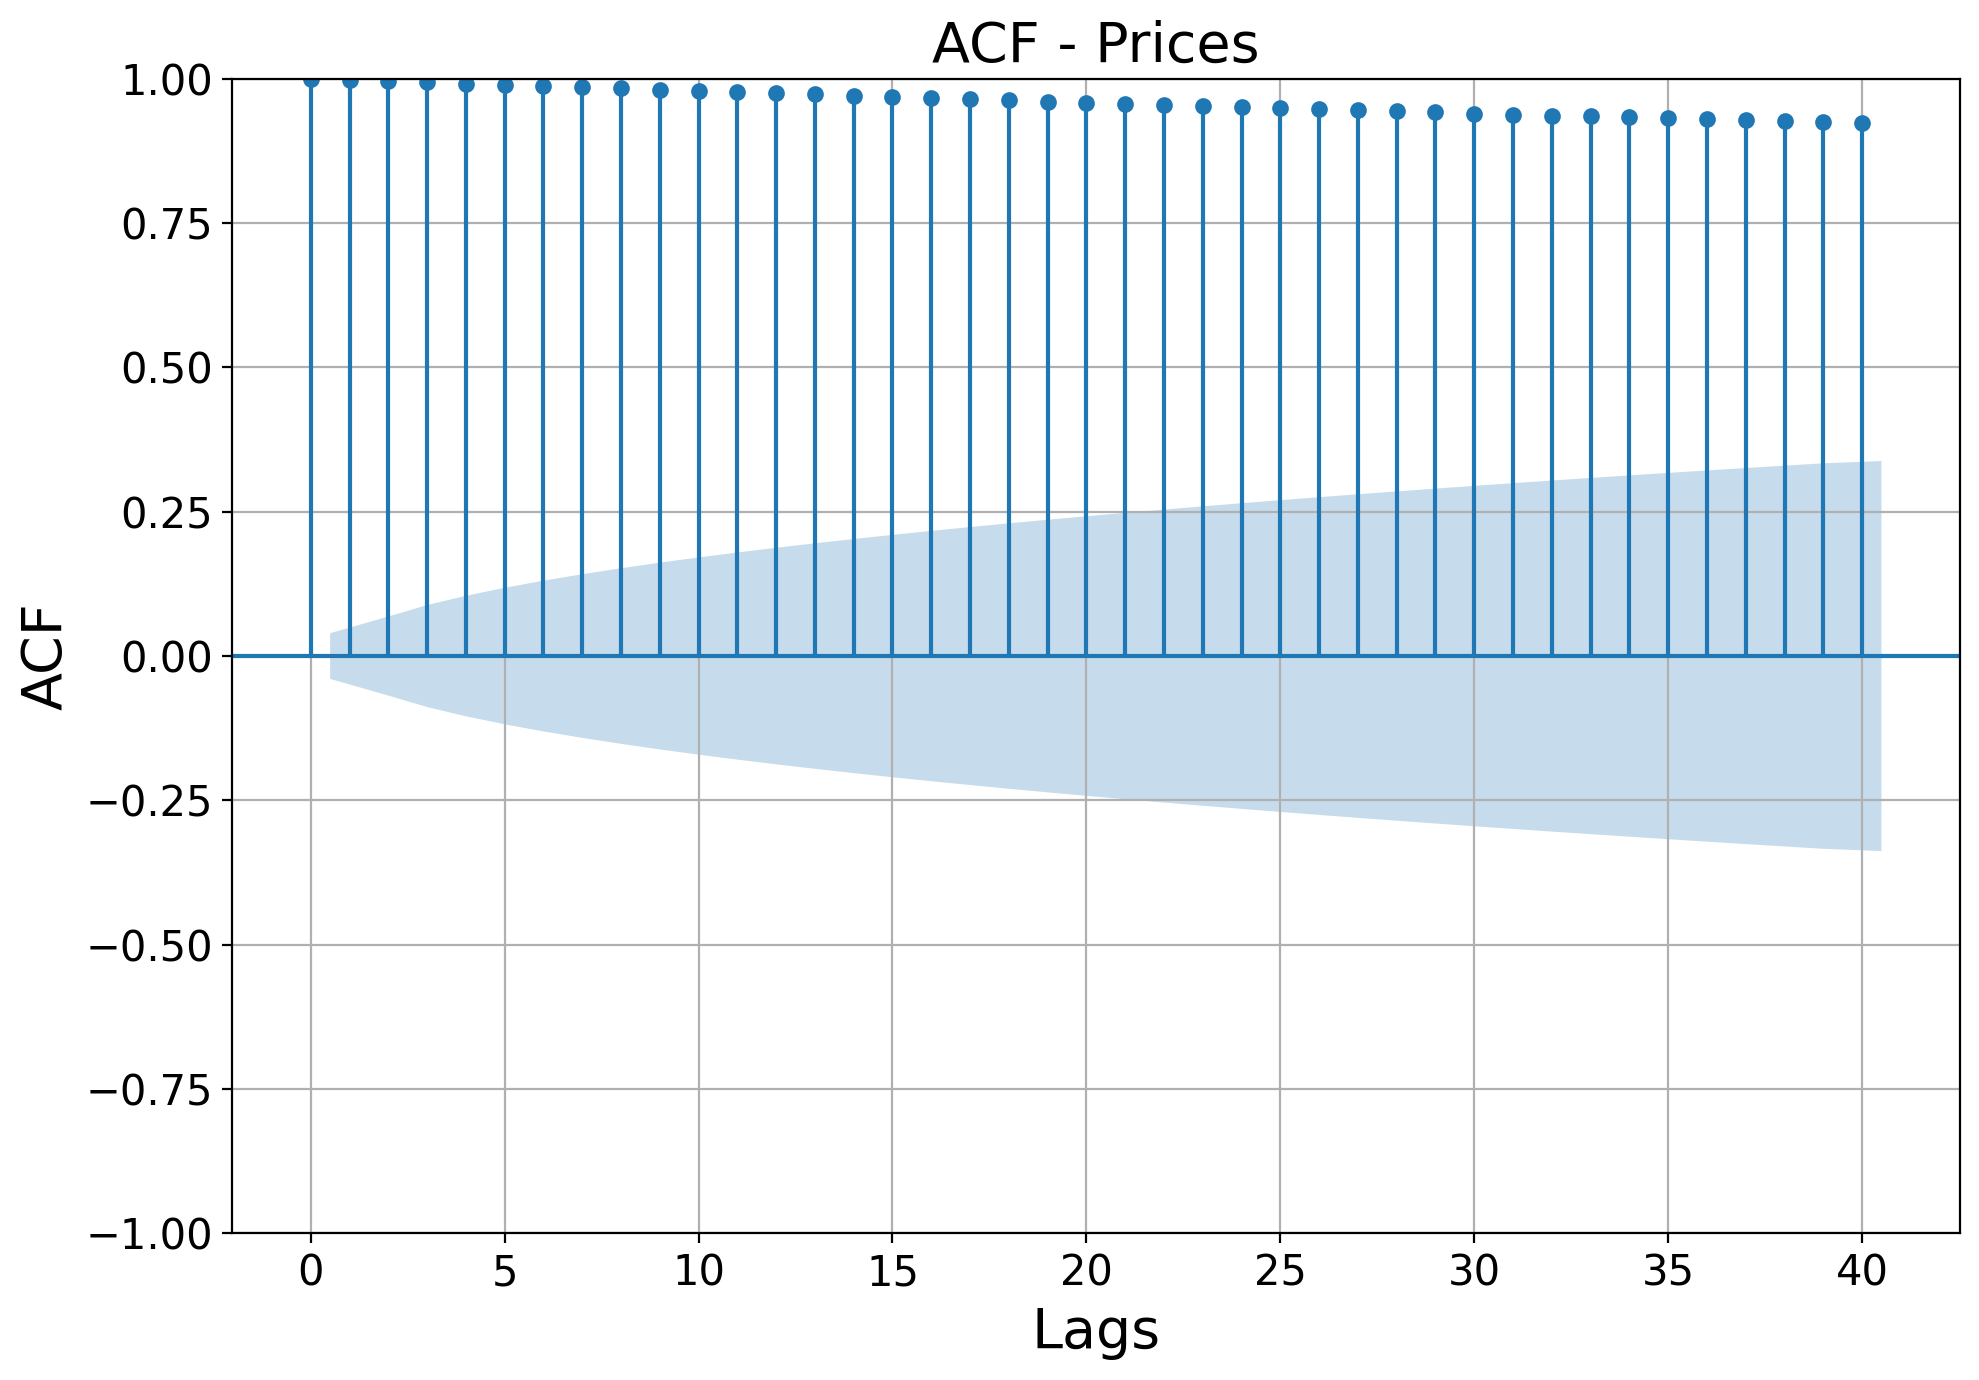

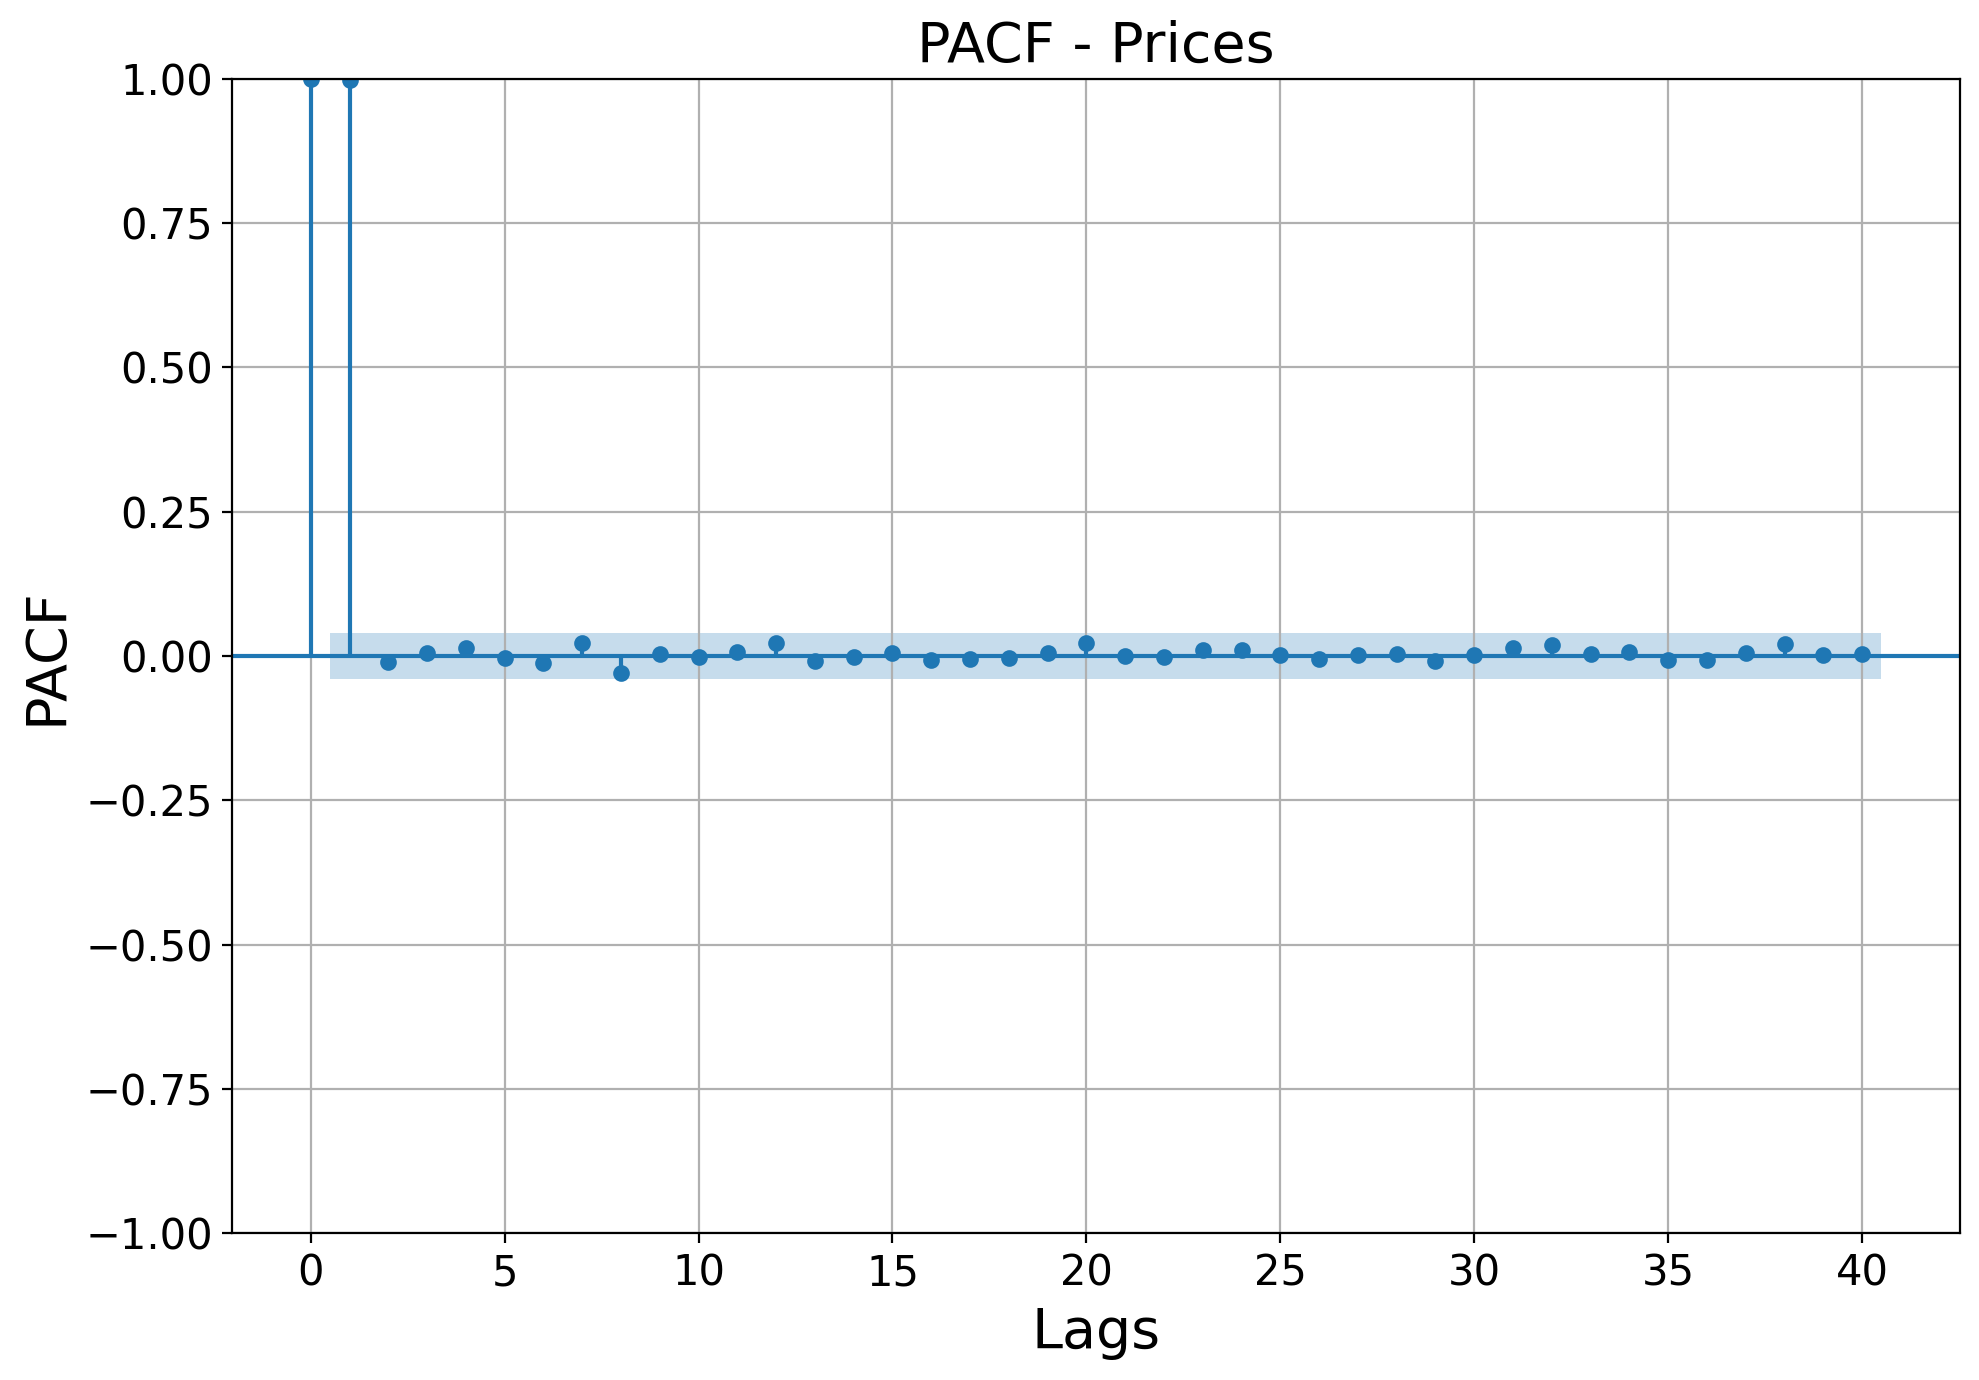

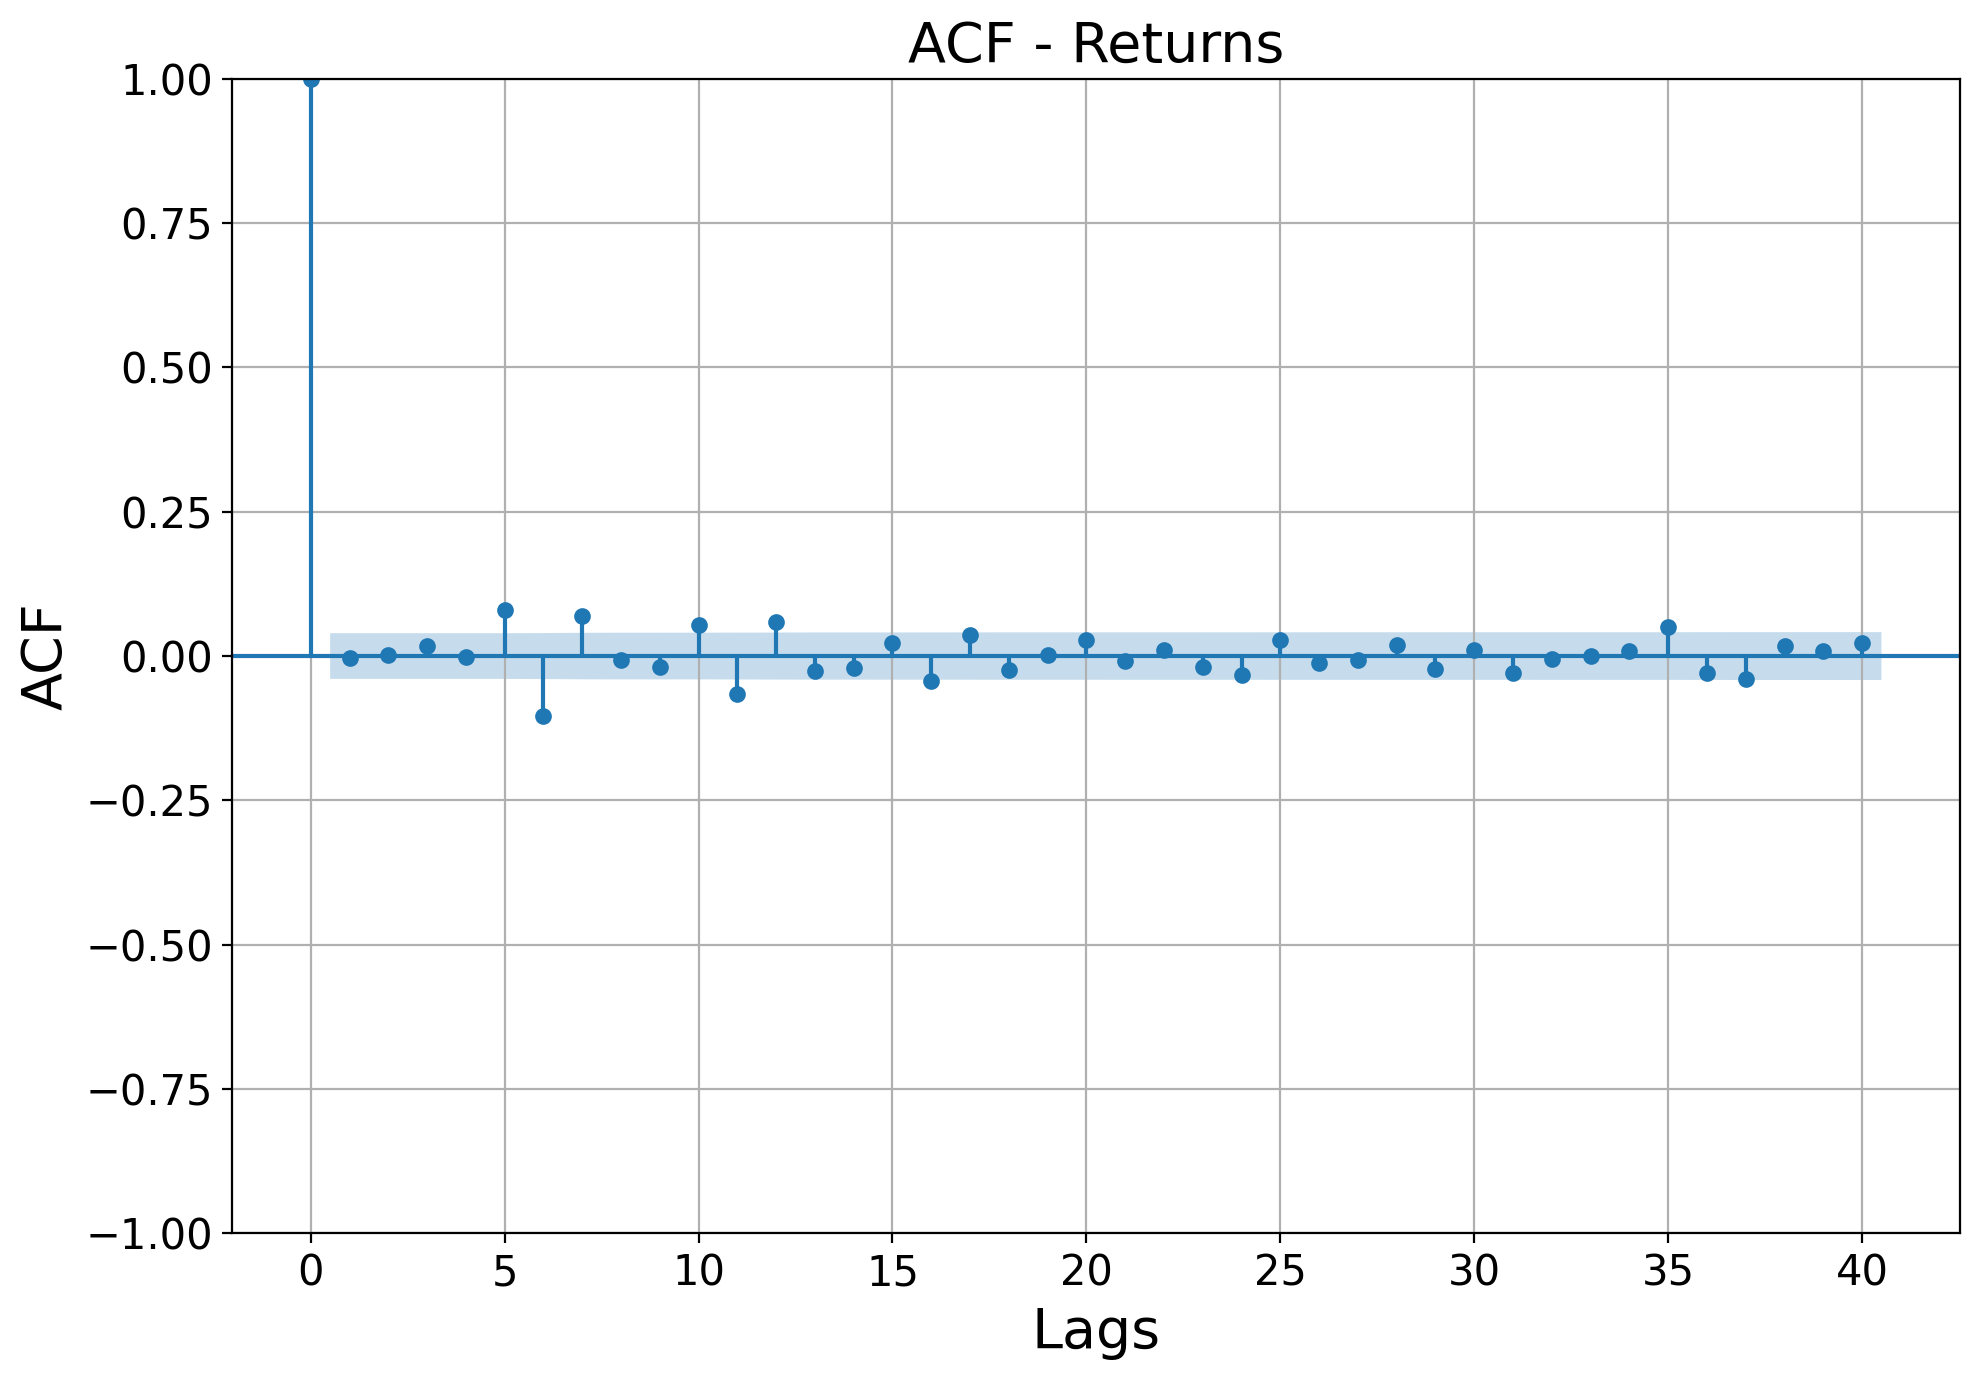

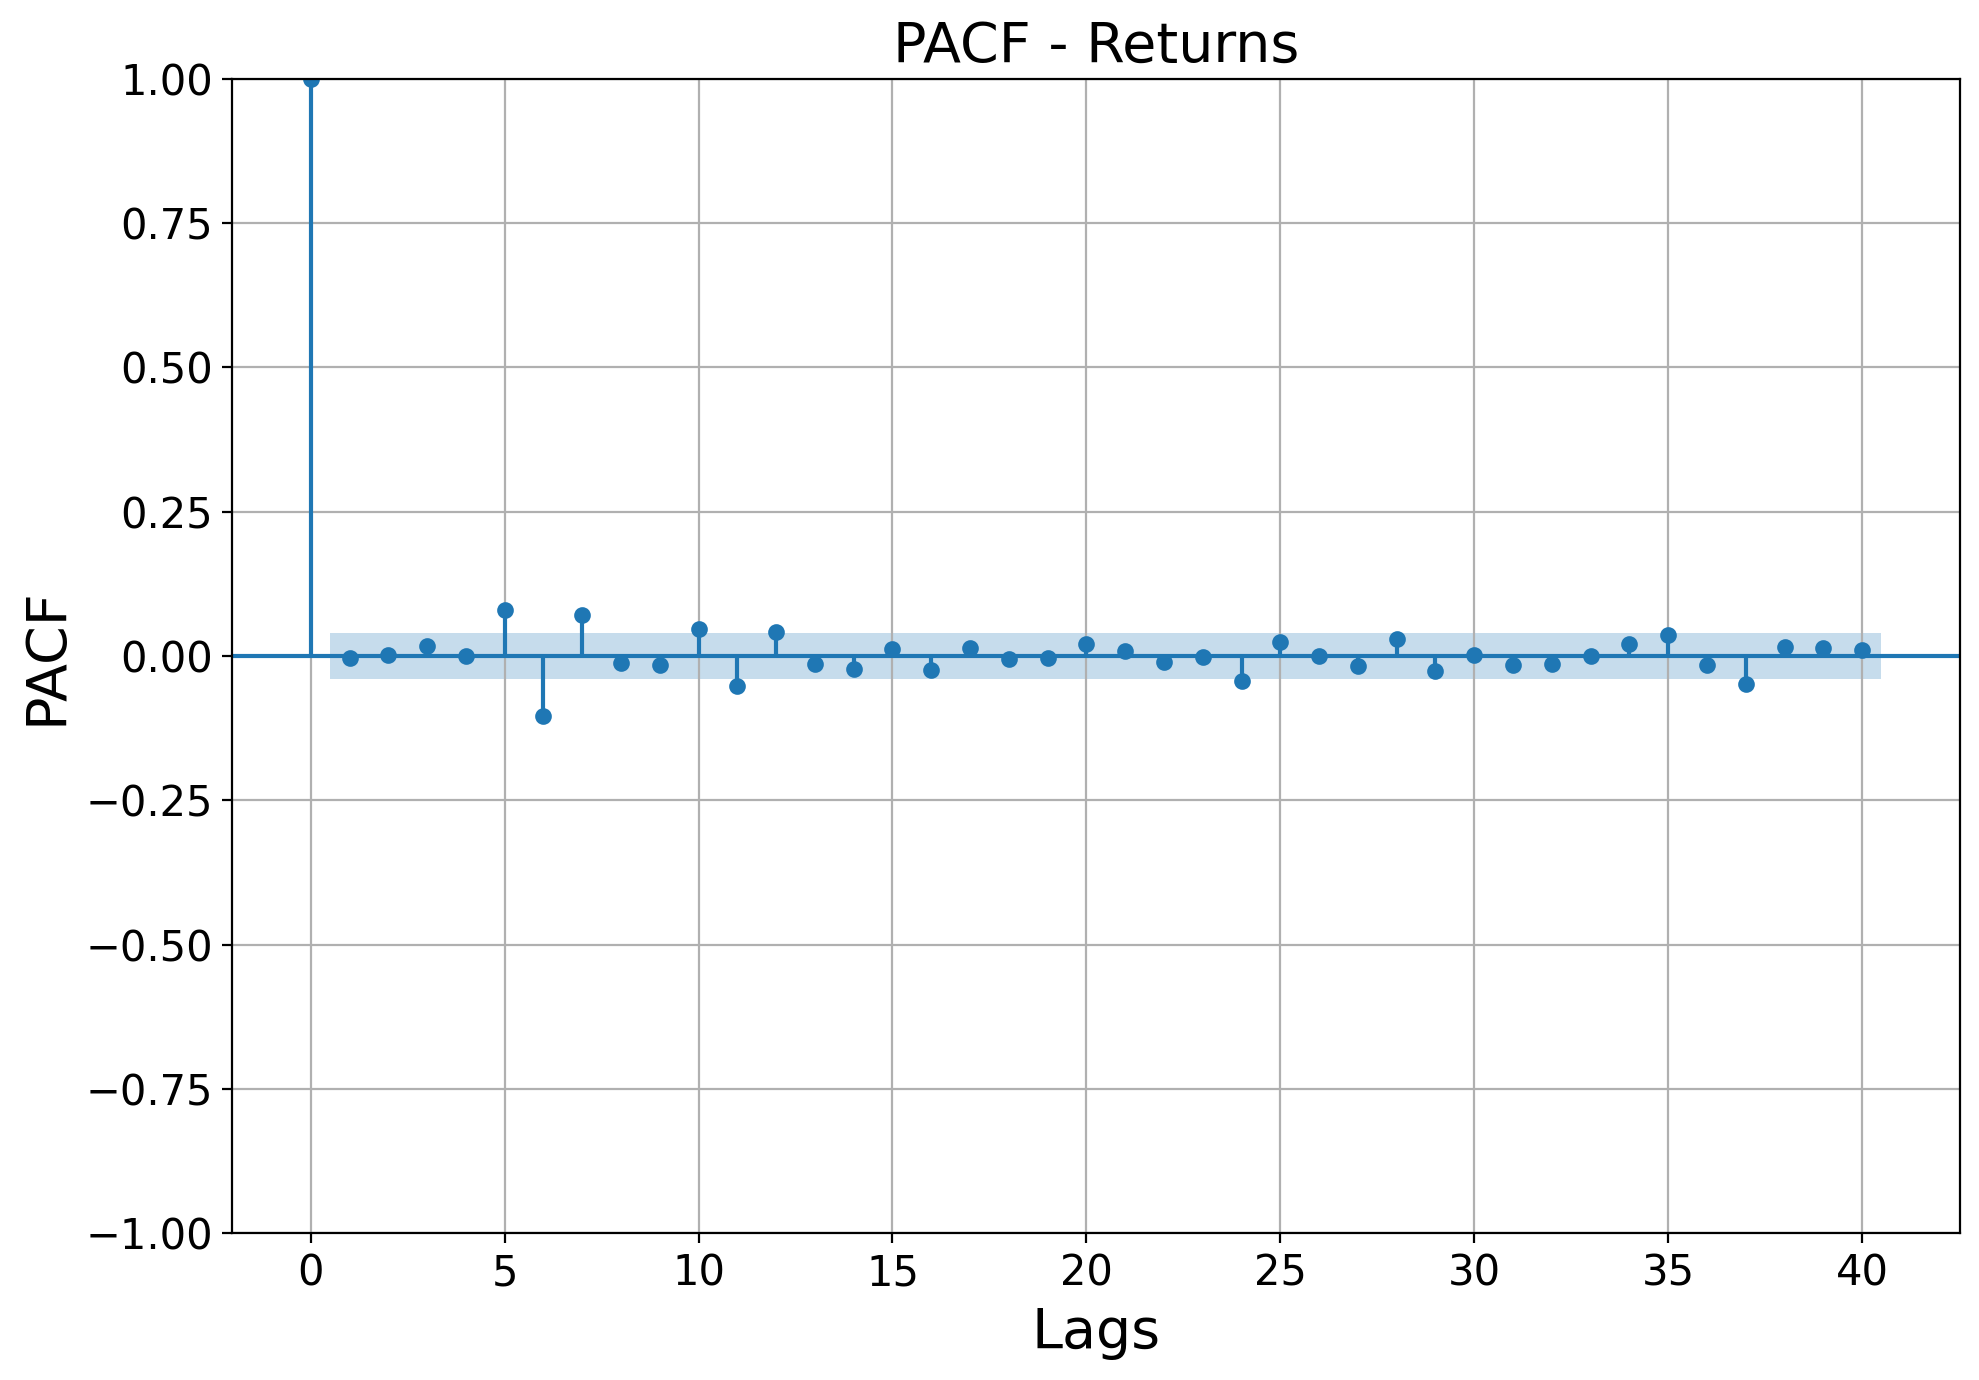

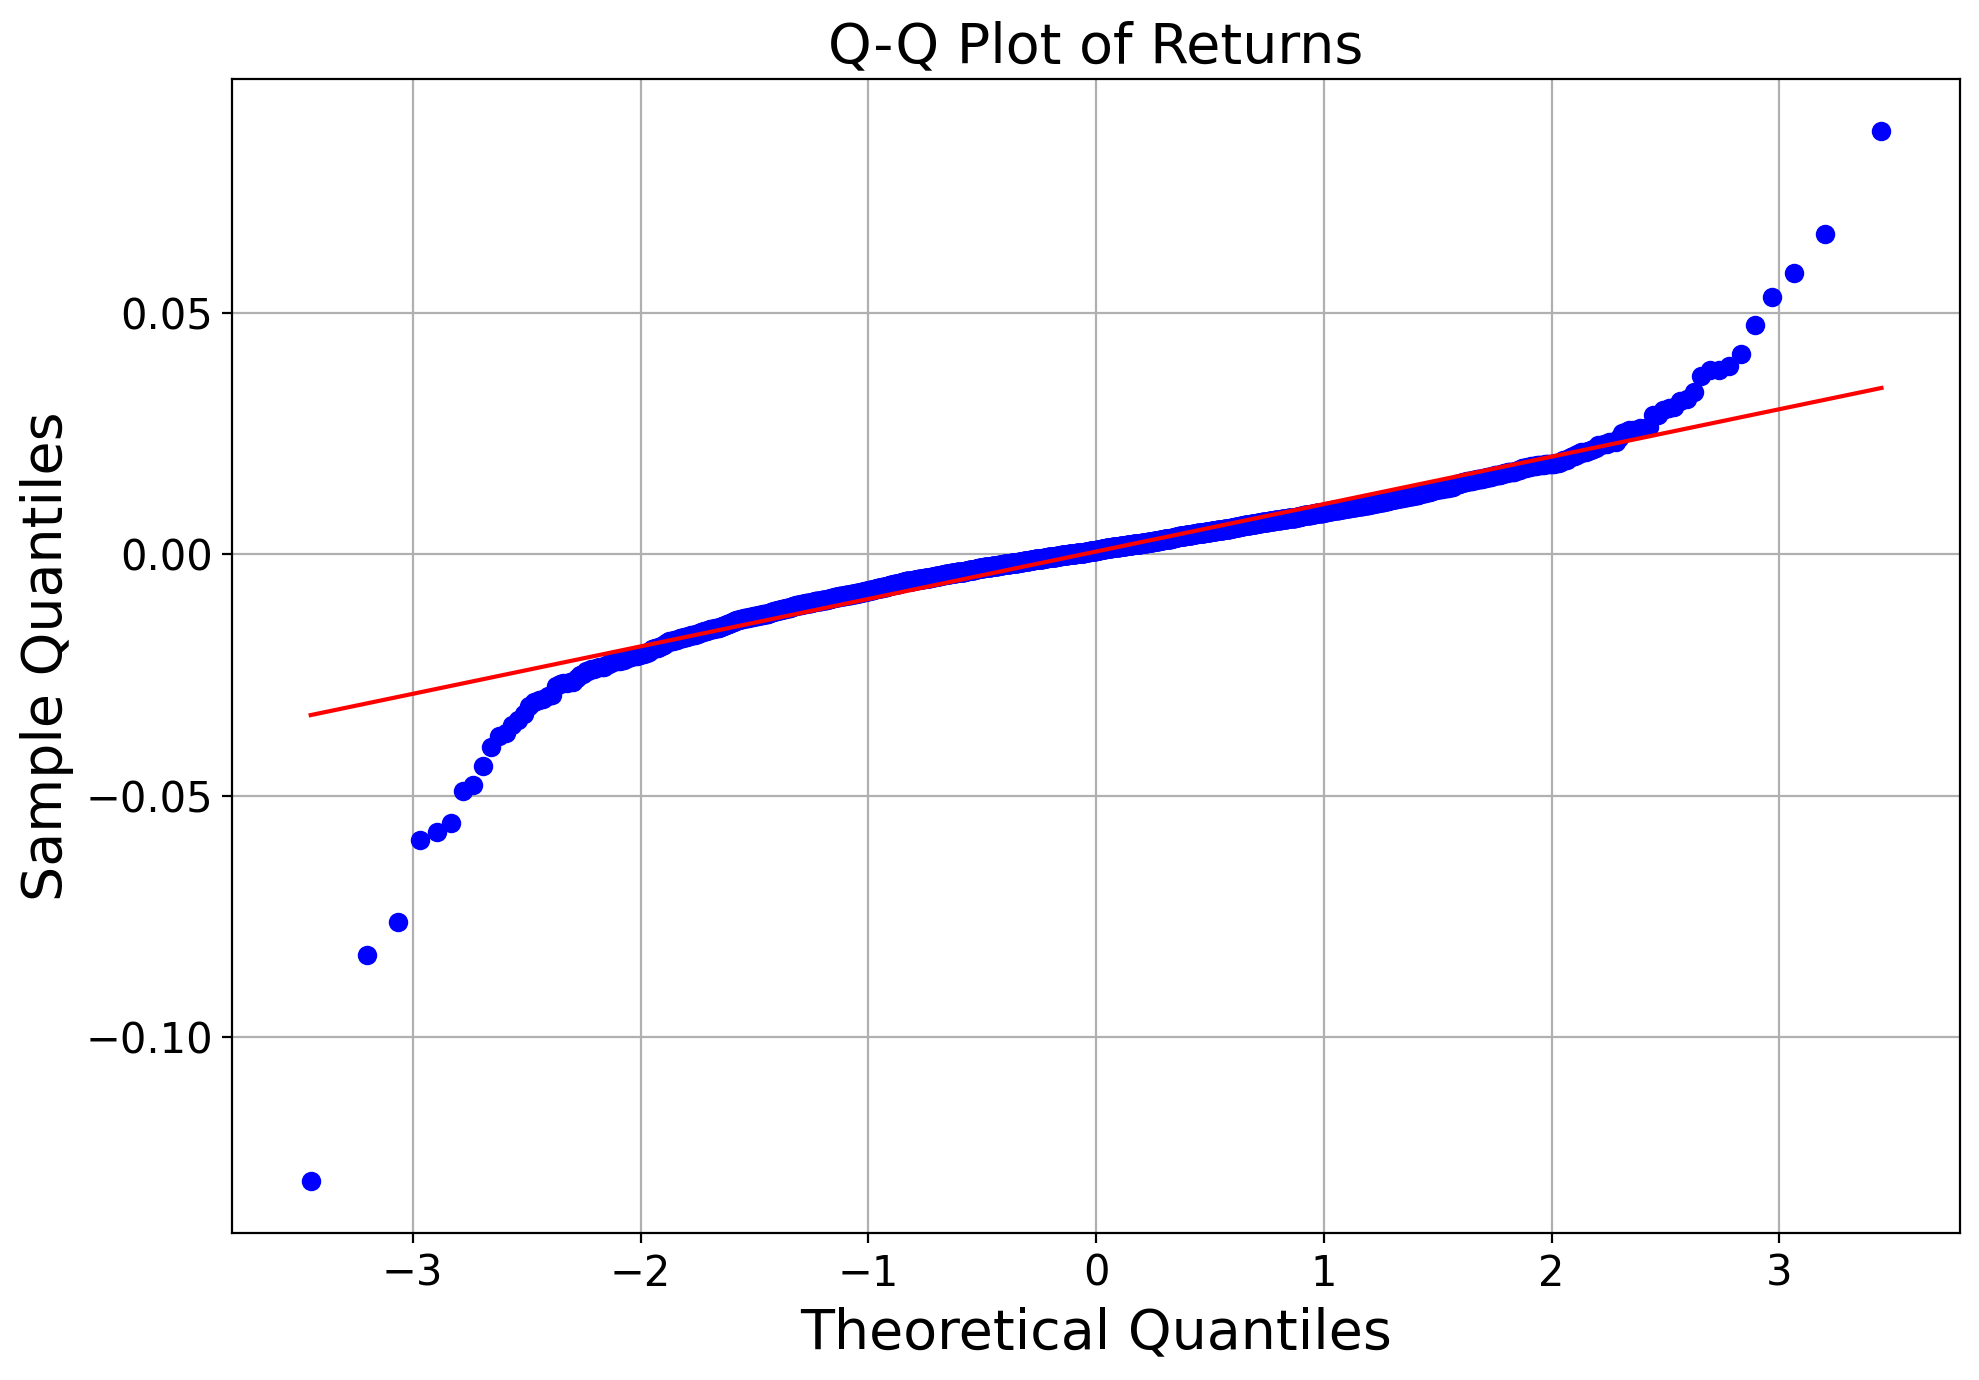

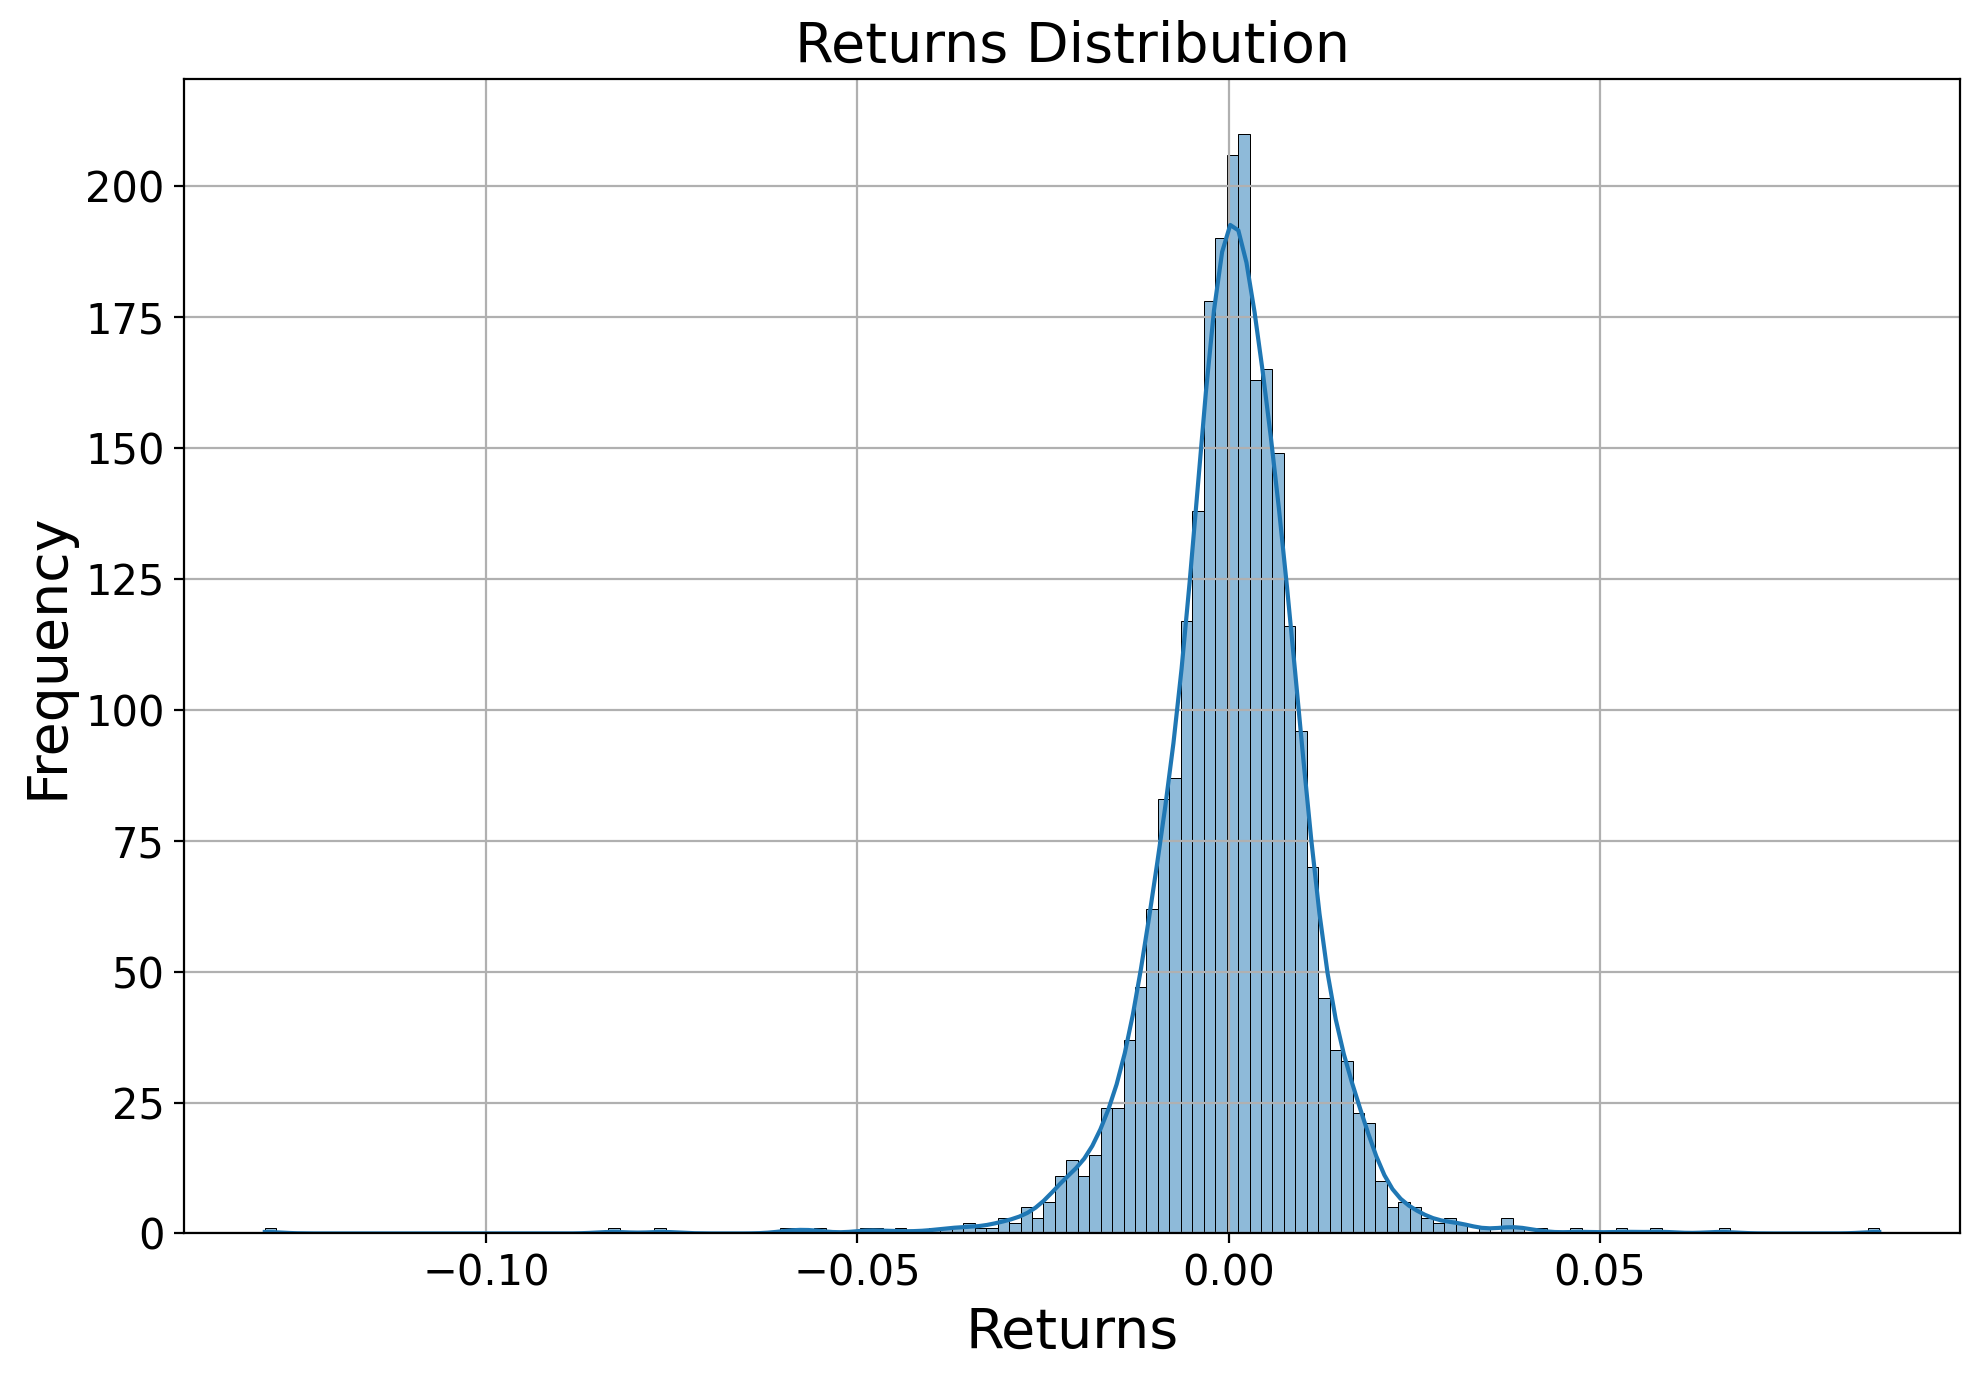


Test Results:

ADF Test Interpretation for Price Series:
- ADF Statistic: 0.4337
- p-value: 0.9827
- Null Hypothesis: Series has a unit root (non-stationary)
- Conclusion: Series is non-stationary
- Critical Values:
  1%: -3.4330
  5%: -2.8627
  10%: -2.5674

ADF Test Interpretation for Returns Series:
- ADF Statistic: -13.6240
- p-value: 0.0000
- Null Hypothesis: Series has a unit root (non-stationary)
- Conclusion: Series is stationary
- Critical Values:
  1%: -3.4330
  5%: -2.8627
  10%: -2.5674

Ljung-Box Test Interpretation:
- Null Hypothesis: Data are independently distributed
- Conclusion:
  Lag 10: Autocorrelation present
  Lag 20: Autocorrelation present
  Lag 30: Autocorrelation present

Normality Test Interpretation:
- p-value: 0.0000
- Kurtosis: 17.6823 (Normal = 0)
- Skewness: -1.0668 (Normal = 0)
- Conclusion: Non-normal distribution


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Fetch stock data
def fetch_stock_data(ticker, start_date, end_date, file_name):
    data = yf.download(ticker, start=start_date, end=end_date)
    data.to_csv(file_name)
    return data

# Check stationarity
def check_stationarity(series, title):
    result = adfuller(series)
    interpretation = f"\nADF Test Interpretation for {title}:"
    interpretation += f"\n- ADF Statistic: {result[0]:.4f}"
    interpretation += f"\n- p-value: {result[1]:.4f}"
    interpretation += "\n- Null Hypothesis: Series has a unit root (non-stationary)"
    interpretation += f"\n- Conclusion: Series is {'stationary' if result[1] < 0.05 else 'non-stationary'}"
    interpretation += "\n- Critical Values:"
    for key, value in result[4].items():
        interpretation += f"\n  {key}: {value:.4f}"
    return result[1] < 0.05, interpretation

# Ljung-Box test interpretation
def interpret_ljung_box(lb_test):
    interpretation = "\nLjung-Box Test Interpretation:"
    interpretation += "\n- Null Hypothesis: Data are independently distributed"
    interpretation += "\n- Conclusion:"
    for index, row in lb_test.iterrows():
        interpretation += f"\n  Lag {index}: {'Autocorrelation present' if row['lb_pvalue'] < 0.05 else 'No significant autocorrelation'}"
    return interpretation

# Normality test interpretation
def interpret_normality(returns):
    stat, p_value = stats.normaltest(returns)
    kurtosis = stats.kurtosis(returns)
    skewness = stats.skew(returns)

    interpretation = "\nNormality Test Interpretation:"
    interpretation += f"\n- p-value: {p_value:.4f}"
    interpretation += f"\n- Kurtosis: {kurtosis:.4f} (Normal = 0)"
    interpretation += f"\n- Skewness: {skewness:.4f} (Normal = 0)"
    interpretation += "\n- Conclusion: "
    interpretation += "Non-normal distribution" if p_value < 0.05 else "Cannot reject normality"
    return interpretation

# Plot function
def create_plots(data):
    plots = [
        ('Original Price Series', data['Close'], 'price_series.pdf', 'Time', 'Price'),
        ('Returns', data['Return'], 'returns_series.pdf', 'Time', 'Returns'),
        ('ACF - Prices', lambda ax: plot_acf(data['Close'], lags=40, ax=ax), 'acf_prices.pdf', 'Lags', 'ACF'),
        ('PACF - Prices', lambda ax: plot_pacf(data['Close'], lags=40, ax=ax), 'pacf_prices.pdf', 'Lags', 'PACF'),
        ('ACF - Returns', lambda ax: plot_acf(data['Return'], lags=40, ax=ax), 'acf_returns.pdf', 'Lags', 'ACF'),
        ('PACF - Returns', lambda ax: plot_pacf(data['Return'], lags=40, ax=ax), 'pacf_returns.pdf', 'Lags', 'PACF'),
        ('Q-Q Plot of Returns', lambda ax: stats.probplot(data['Return'].values, dist="norm", plot=ax), 'qq_plot_returns.pdf', 'Theoretical Quantiles', 'Sample Quantiles'),
        ('Returns Distribution', lambda ax: sb.histplot(data['Return'], kde=True, ax=ax), 'returns_distribution.pdf', 'Returns', 'Frequency')
    ]

    for title, content, filename, xlabel, ylabel in plots:
        fig, ax = plt.subplots(dpi=200, figsize=(10, 7))
        if callable(content):  # Check if content is a plotting function
            content(ax)
        else:
            ax.plot(content)
        ax.set_title(title, fontsize=20)
        ax.set_xlabel(xlabel, fontsize=20)
        ax.set_ylabel(ylabel, fontsize=20)
        ax.grid(True)
        ax.tick_params(labelsize=15)
        plt.tight_layout()
        plt.savefig(filename)
        plt.show()

# Main execution
ticker = "^NSEI"
data = fetch_stock_data(ticker, "2014-01-01", "2024-01-01", "nifty50_data.csv")
data['Return'] = data['Close'].pct_change()
data.dropna(inplace=True)

# Create plots
create_plots(data)

# Perform and interpret tests
prices_stationary, prices_adf_interp = check_stationarity(data['Close'], 'Price Series')
returns_stationary, returns_adf_interp = check_stationarity(data['Return'], 'Returns Series')

lb_test = acorr_ljungbox(data['Return'], lags=[10, 20, 30], return_df=True)
lb_interpretation = interpret_ljung_box(lb_test)

normality_interpretation = interpret_normality(data['Return'])

print("\nTest Results:")
print(prices_adf_interp)
print(returns_adf_interp)
print(lb_interpretation)
print(normality_interpretation)

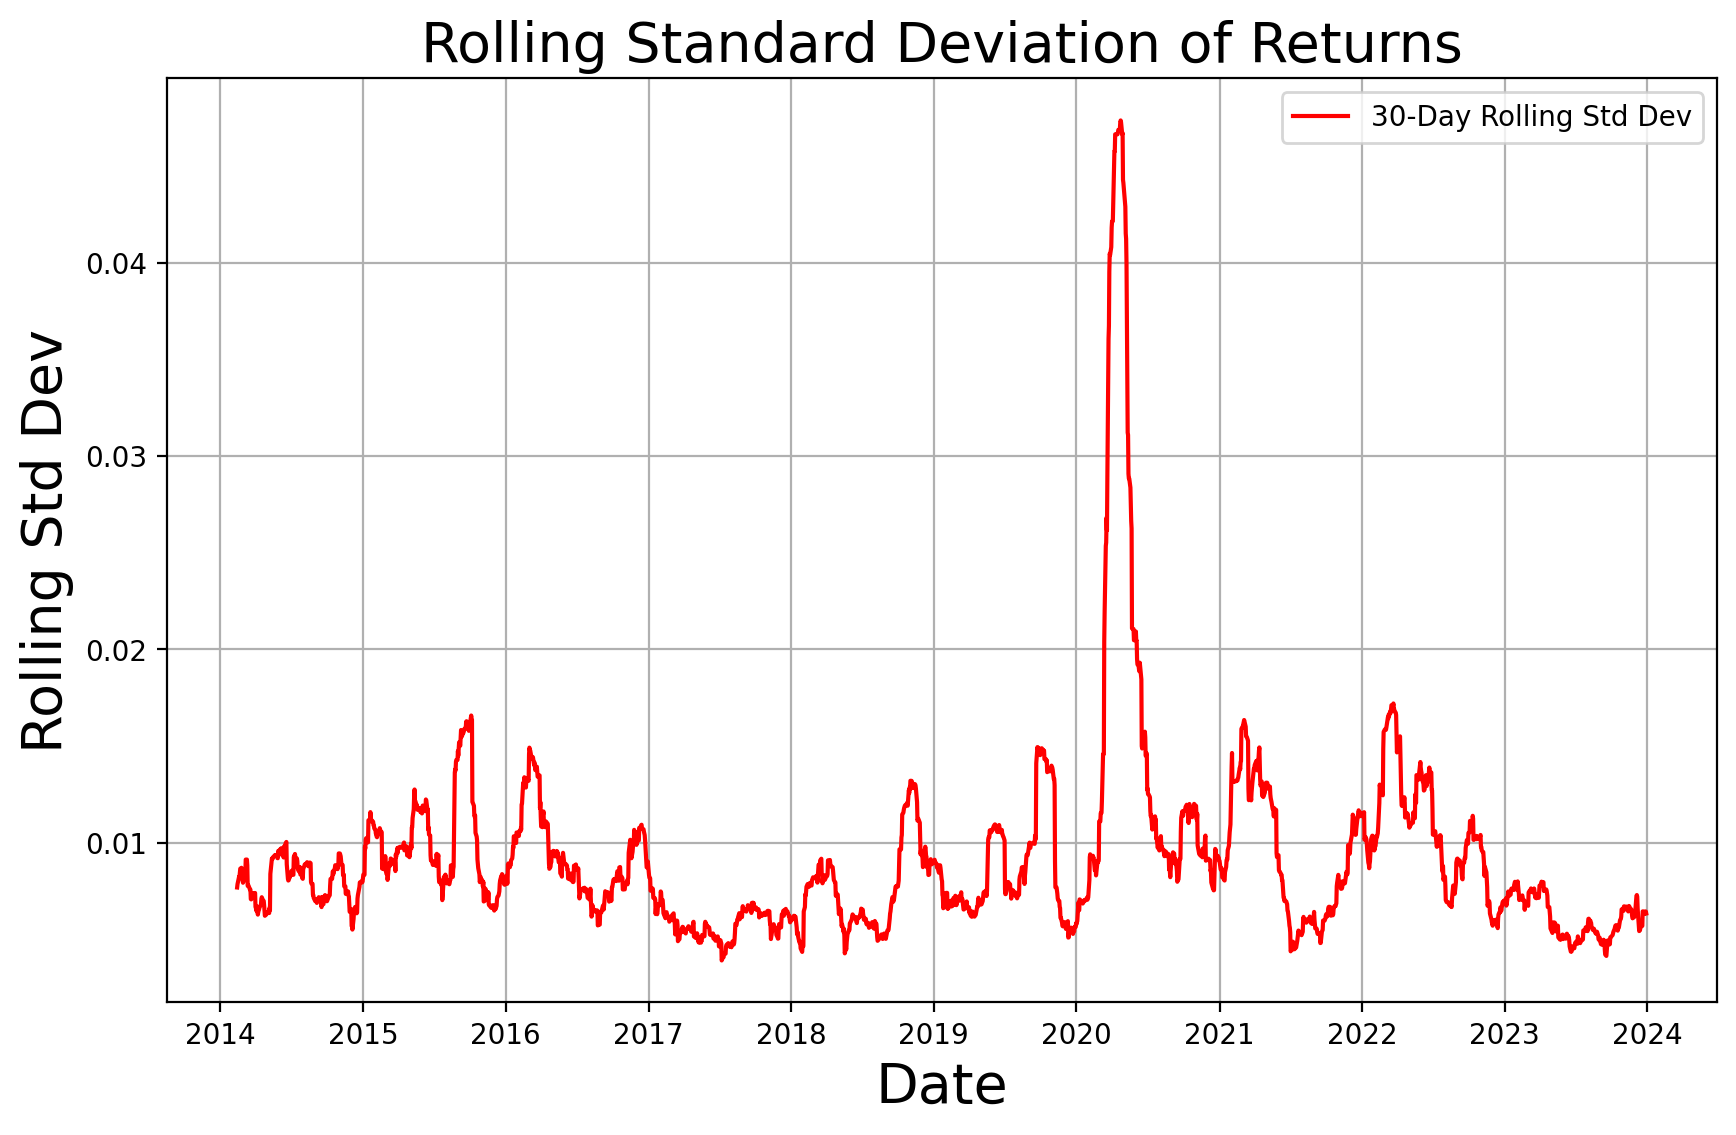

In [3]:
# Calculate rolling standard deviation
rolling_std = data['Return'].rolling(window=30).std()

# Plot rolling standard deviation
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(rolling_std, label="30-Day Rolling Std Dev", color='red')
plt.title("Rolling Standard Deviation of Returns", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Rolling Std Dev", fontsize=20)
plt.grid(True)
plt.legend()
plt.savefig('rolling_std_returns.pdf')
plt.show()

## Statistical Models: ARIMA, SARIMA, ETS

[*********************100%***********************]  1 of 1 completed
C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\t

Error evaluating model: LU decomposition error.


C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will 

Error evaluating model: LU decomposition error.


C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no

Error evaluating model: LU decomposition error.


C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no

Error evaluating model: LU decomposition error.


C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Aero\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will 

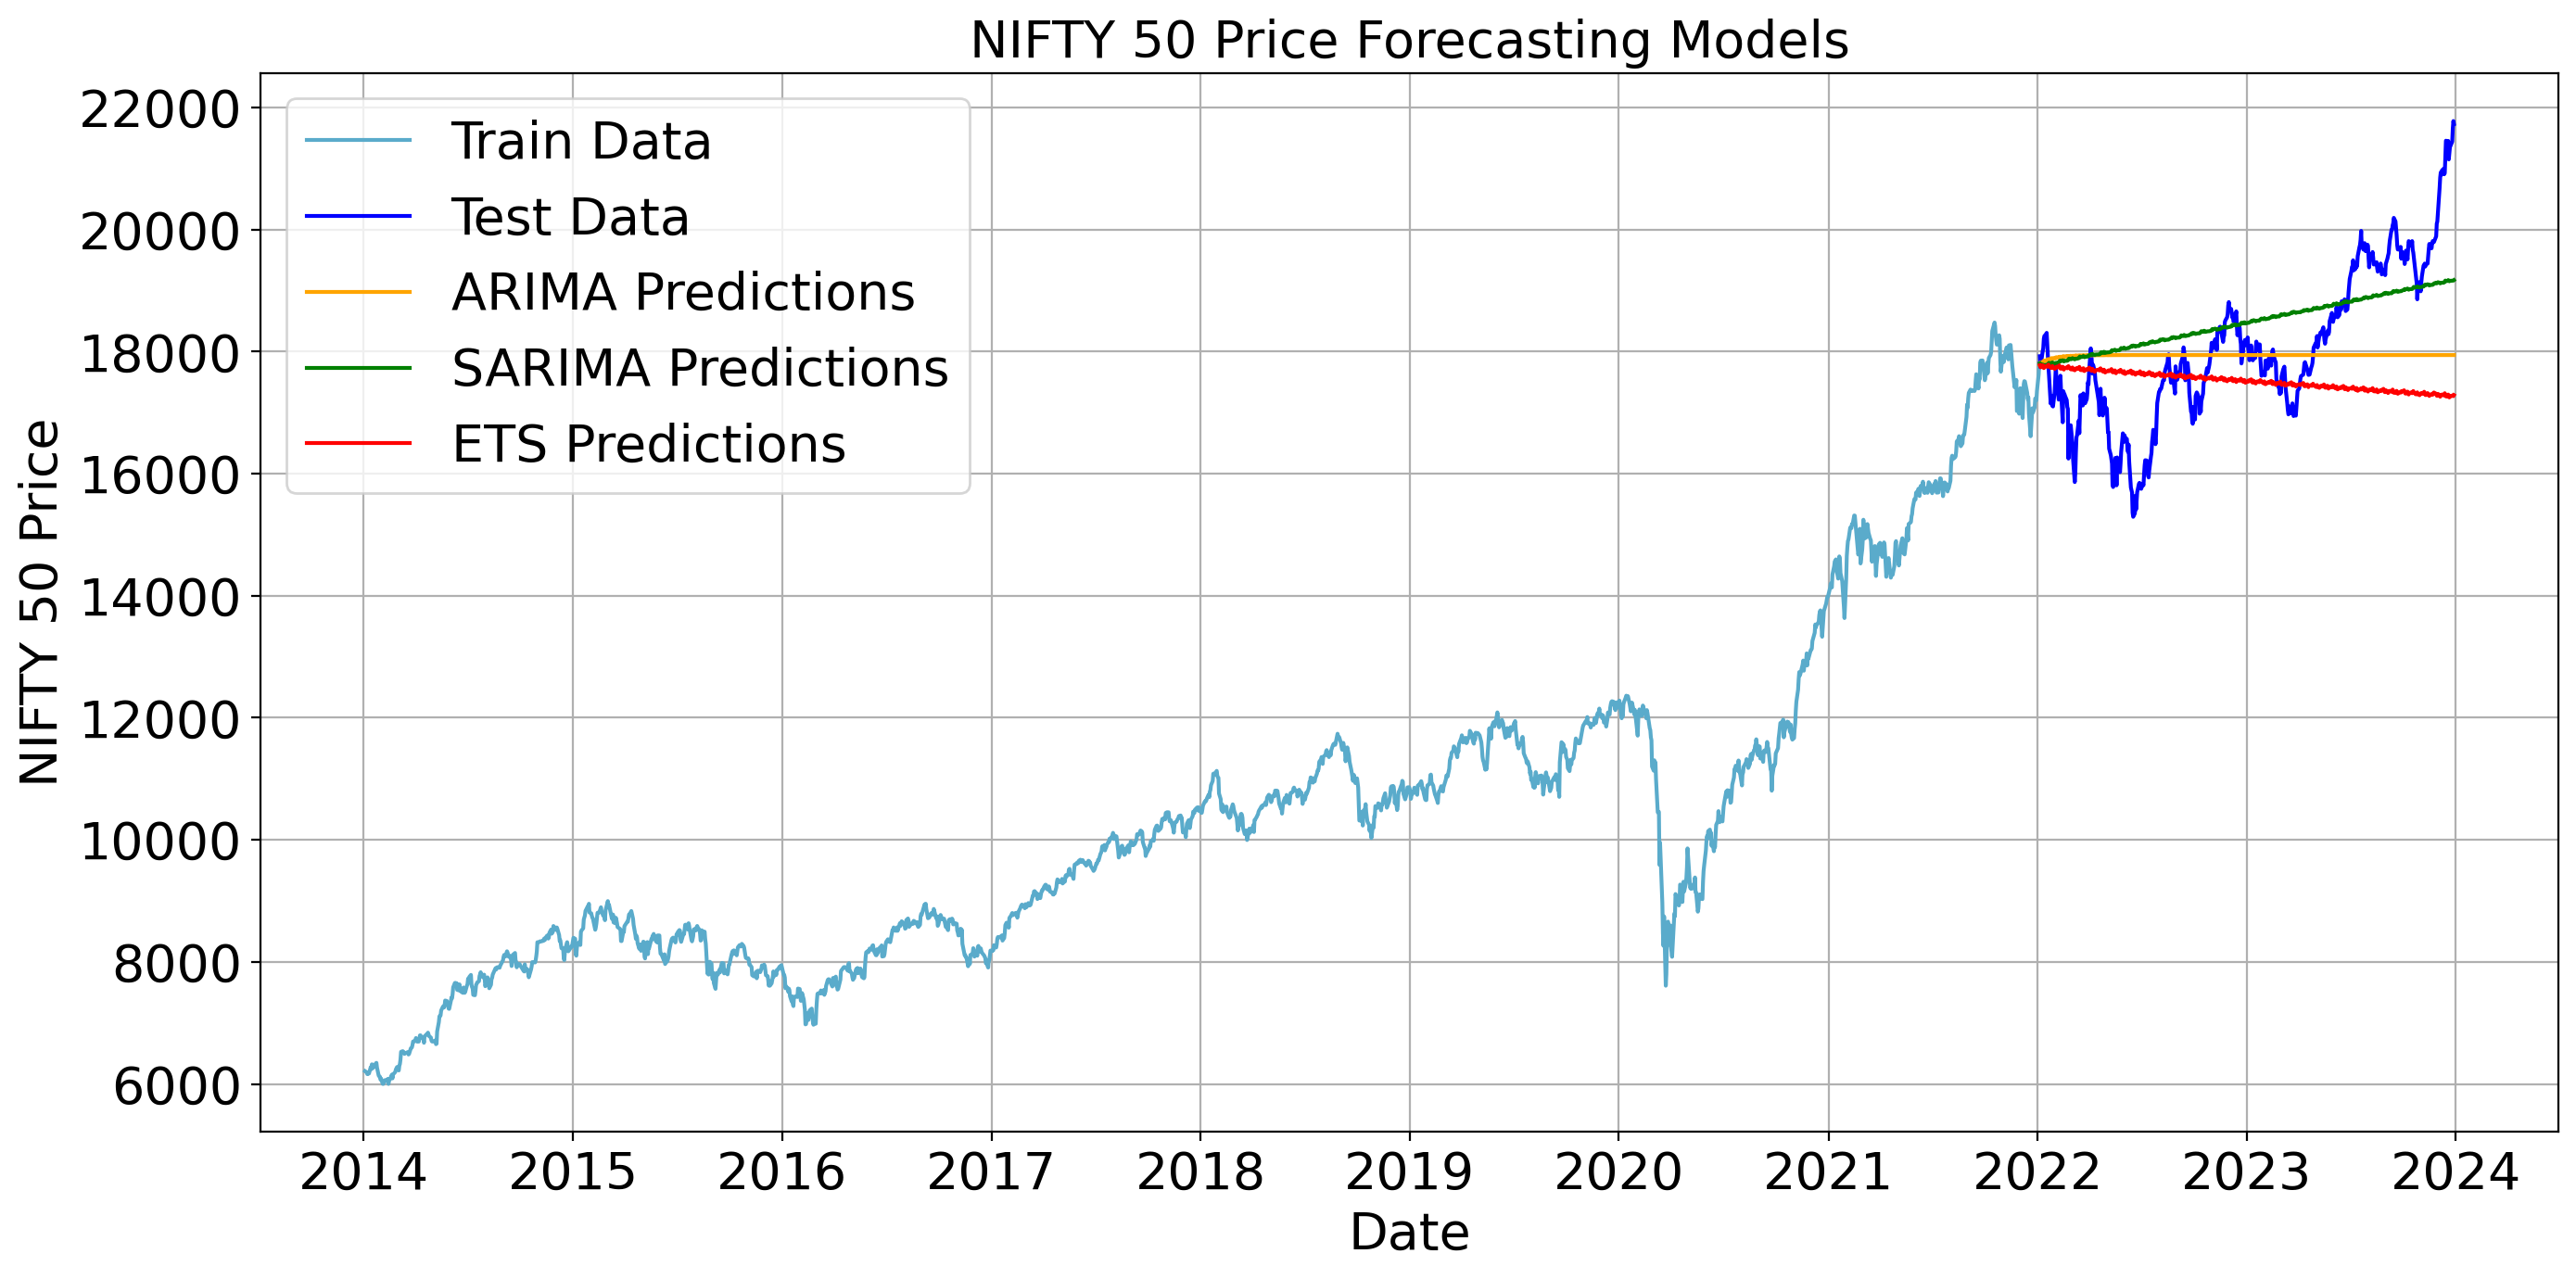

Model evaluation completed and results saved.


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import time  # For measuring execution time
import yfinance as yf  # Yahoo Finance API for fetching data

# Step 1: Data Import and Preprocessing
def fetch_stock_data(ticker, start_date, end_date, file_name):
    """
    Fetches historical stock data from Yahoo Finance and saves it as a CSV.
    """
    data = yf.download(ticker, start=start_date, end=end_date)
    data.to_csv(file_name)
    return data

# Define the ticker symbol and fetch data
ticker = "^NSEI"  # NIFTY 50 Index
data = fetch_stock_data(ticker, "2014-01-01", "2024-01-01", "nifty50_data.csv")

# Add daily returns column and clean data
data['Return'] = data['Close'].pct_change()
data.dropna(inplace=True)

# Step 2: Split Data into Training and Testing Sets
train_size = int(len(data) * 0.8)
train, test = data['Close'][:train_size], data['Close'][train_size:]

# Step 3: Model Evaluation with Timing
def evaluate_model(model, train, test):
    """
    Fits a model, calculates metrics, and records execution time.
    """
    start_time = time.time()
    try:
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test))
        mse = mean_squared_error(test, predictions)
        rmse = np.sqrt(mse)
        execution_time = time.time() - start_time
        return predictions, mse, rmse, execution_time
    except Exception as e:
        print(f"Error evaluating model: {e}")
        return None, float('inf'), float('inf'), float('inf')

# Step 4: Grid Search for ARIMA and SARIMA
def grid_search_arima(train, test, p_values, d_values, q_values):
    """
    Finds the best ARIMA parameters using grid search.
    """
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(train, order=(p, d, q))
                    _, mse, _, _ = evaluate_model(model, train, test)
                    if mse < best_score:
                        best_score, best_cfg = mse, (p, d, q)
                except:
                    continue
    return best_cfg, best_score

def grid_search_sarima(train, test, p_values, d_values, q_values, sp_values):
    """
    Finds the best SARIMA parameters using grid search.
    """
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for sp in sp_values:
                    try:
                        model = SARIMAX(
                            train,
                            order=(p, d, q),
                            seasonal_order=(sp[0], sp[1], sp[2], sp[3])
                        )
                        _, mse, _, _ = evaluate_model(model, train, test)
                        if mse < best_score:
                            best_score, best_cfg = mse, (p, d, q, sp)
                    except:
                        continue
    return best_cfg, best_score

# Step 5: Evaluate Models and Store Metrics
Stats_model_metrics = {}

# ARIMA Grid Search
p_values, d_values, q_values = range(0, 5), range(0, 5), range(0, 5)
best_arima_order, arima_score = grid_search_arima(train, test, p_values, d_values, q_values)
arima_model = ARIMA(train, order=best_arima_order)
arima_predictions, arima_mse, arima_rmse, arima_time = evaluate_model(arima_model, train, test)
Stats_model_metrics['ARIMA'] = {'MSE': arima_mse, 'RMSE': arima_rmse, 'Time (s)': arima_time, 'Order': best_arima_order}

# SARIMA Grid Search
sp_values = [(0, 1, 1, 12), (1, 1, 1, 12)]
best_sarima_order, sarima_score = grid_search_sarima(train, test, p_values, d_values, q_values, sp_values)
sarima_model = SARIMAX(train, order=best_sarima_order[:3], seasonal_order=best_sarima_order[3])
sarima_predictions, sarima_mse, sarima_rmse, sarima_time = evaluate_model(sarima_model, train, test)
Stats_model_metrics['SARIMA'] = {'MSE': sarima_mse, 'RMSE': sarima_rmse, 'Time (s)': sarima_time, 'Order': best_sarima_order}

# Exponential Smoothing Model
ets_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
ets_predictions, ets_mse, ets_rmse, ets_time = evaluate_model(ets_model, train, test)
Stats_model_metrics['ETS'] = {'MSE': ets_mse, 'RMSE': ets_rmse, 'Time (s)': ets_time}

# Step 6: Save Results and Visualize Predictions
metrics_Stats_df = pd.DataFrame(Stats_model_metrics).T
metrics_Stats_df.to_csv('stat_model_metrics.csv')

plt.figure(figsize=(14, 7), dpi=200)
plt.plot(data.index[:train_size], train.values, label='Train Data', color='#5aabcb')
plt.plot(data.index[train_size:], test.values, label='Test Data', color='blue')
plt.plot(test.index, arima_predictions, label='ARIMA Predictions', color='orange')
plt.plot(test.index, sarima_predictions, label='SARIMA Predictions', color='green')
plt.plot(test.index, ets_predictions, label='ETS Predictions', color='red')
plt.title('NIFTY 50 Price Forecasting Models', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('NIFTY 50 Price', fontsize=20)
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)  # Set tick label font size
plt.grid()
plt.tight_layout()
plt.savefig('forecast_plot.pdf')
plt.show()

print("Model evaluation completed and results saved.")

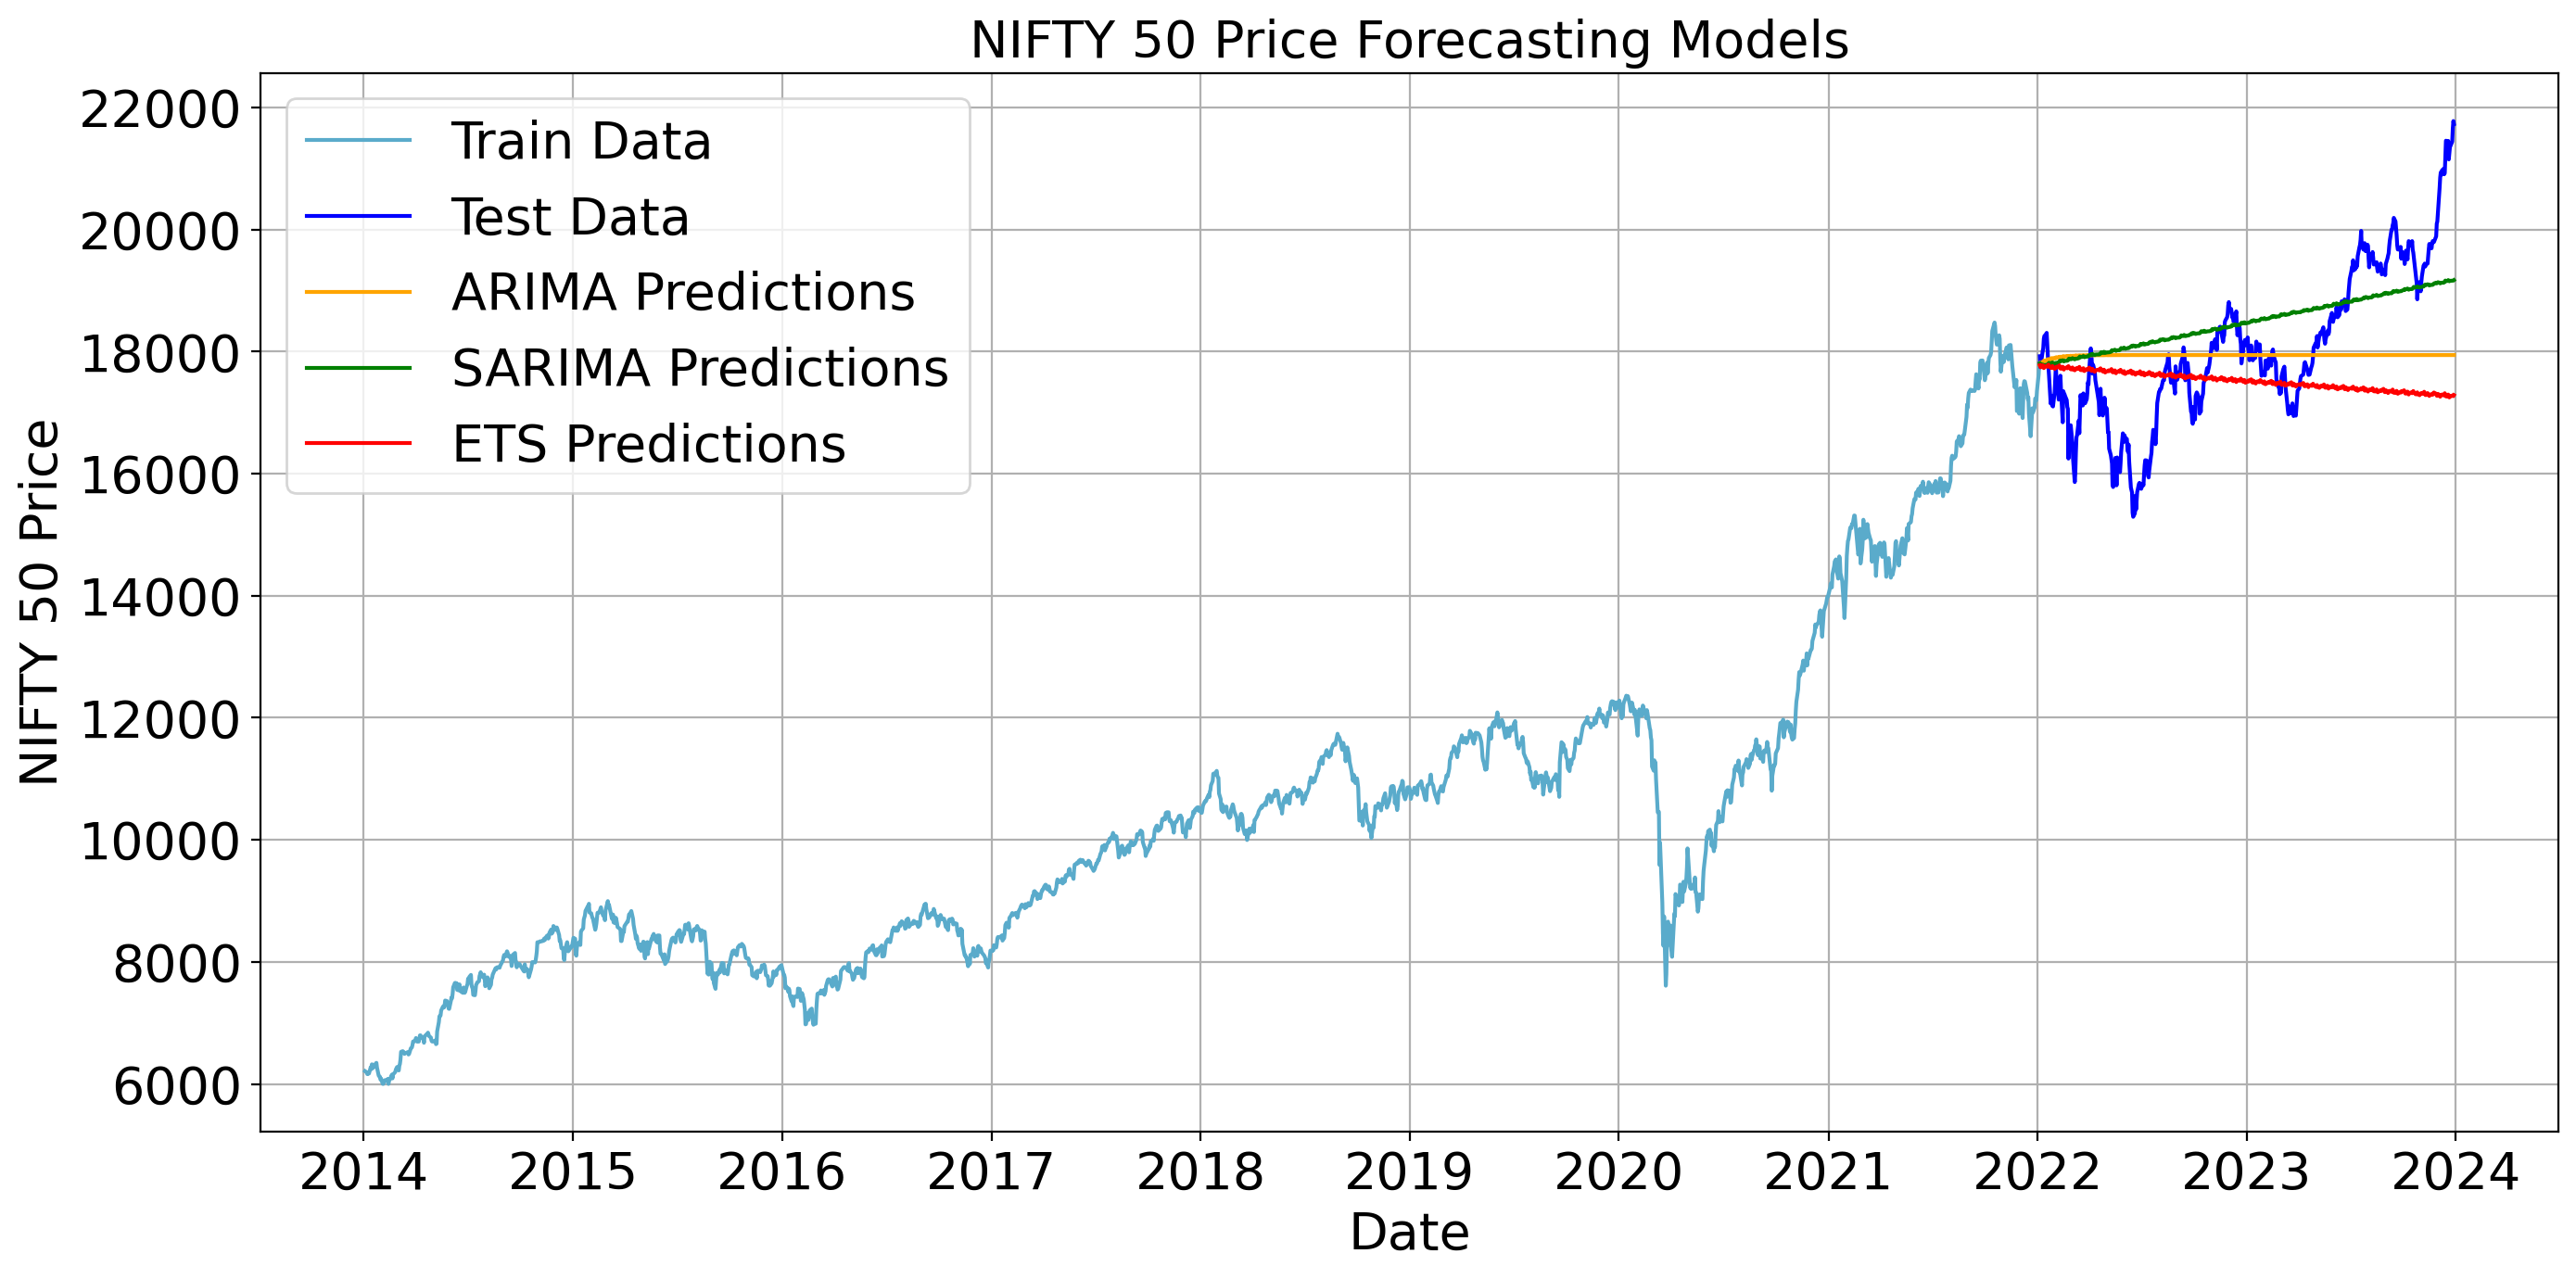

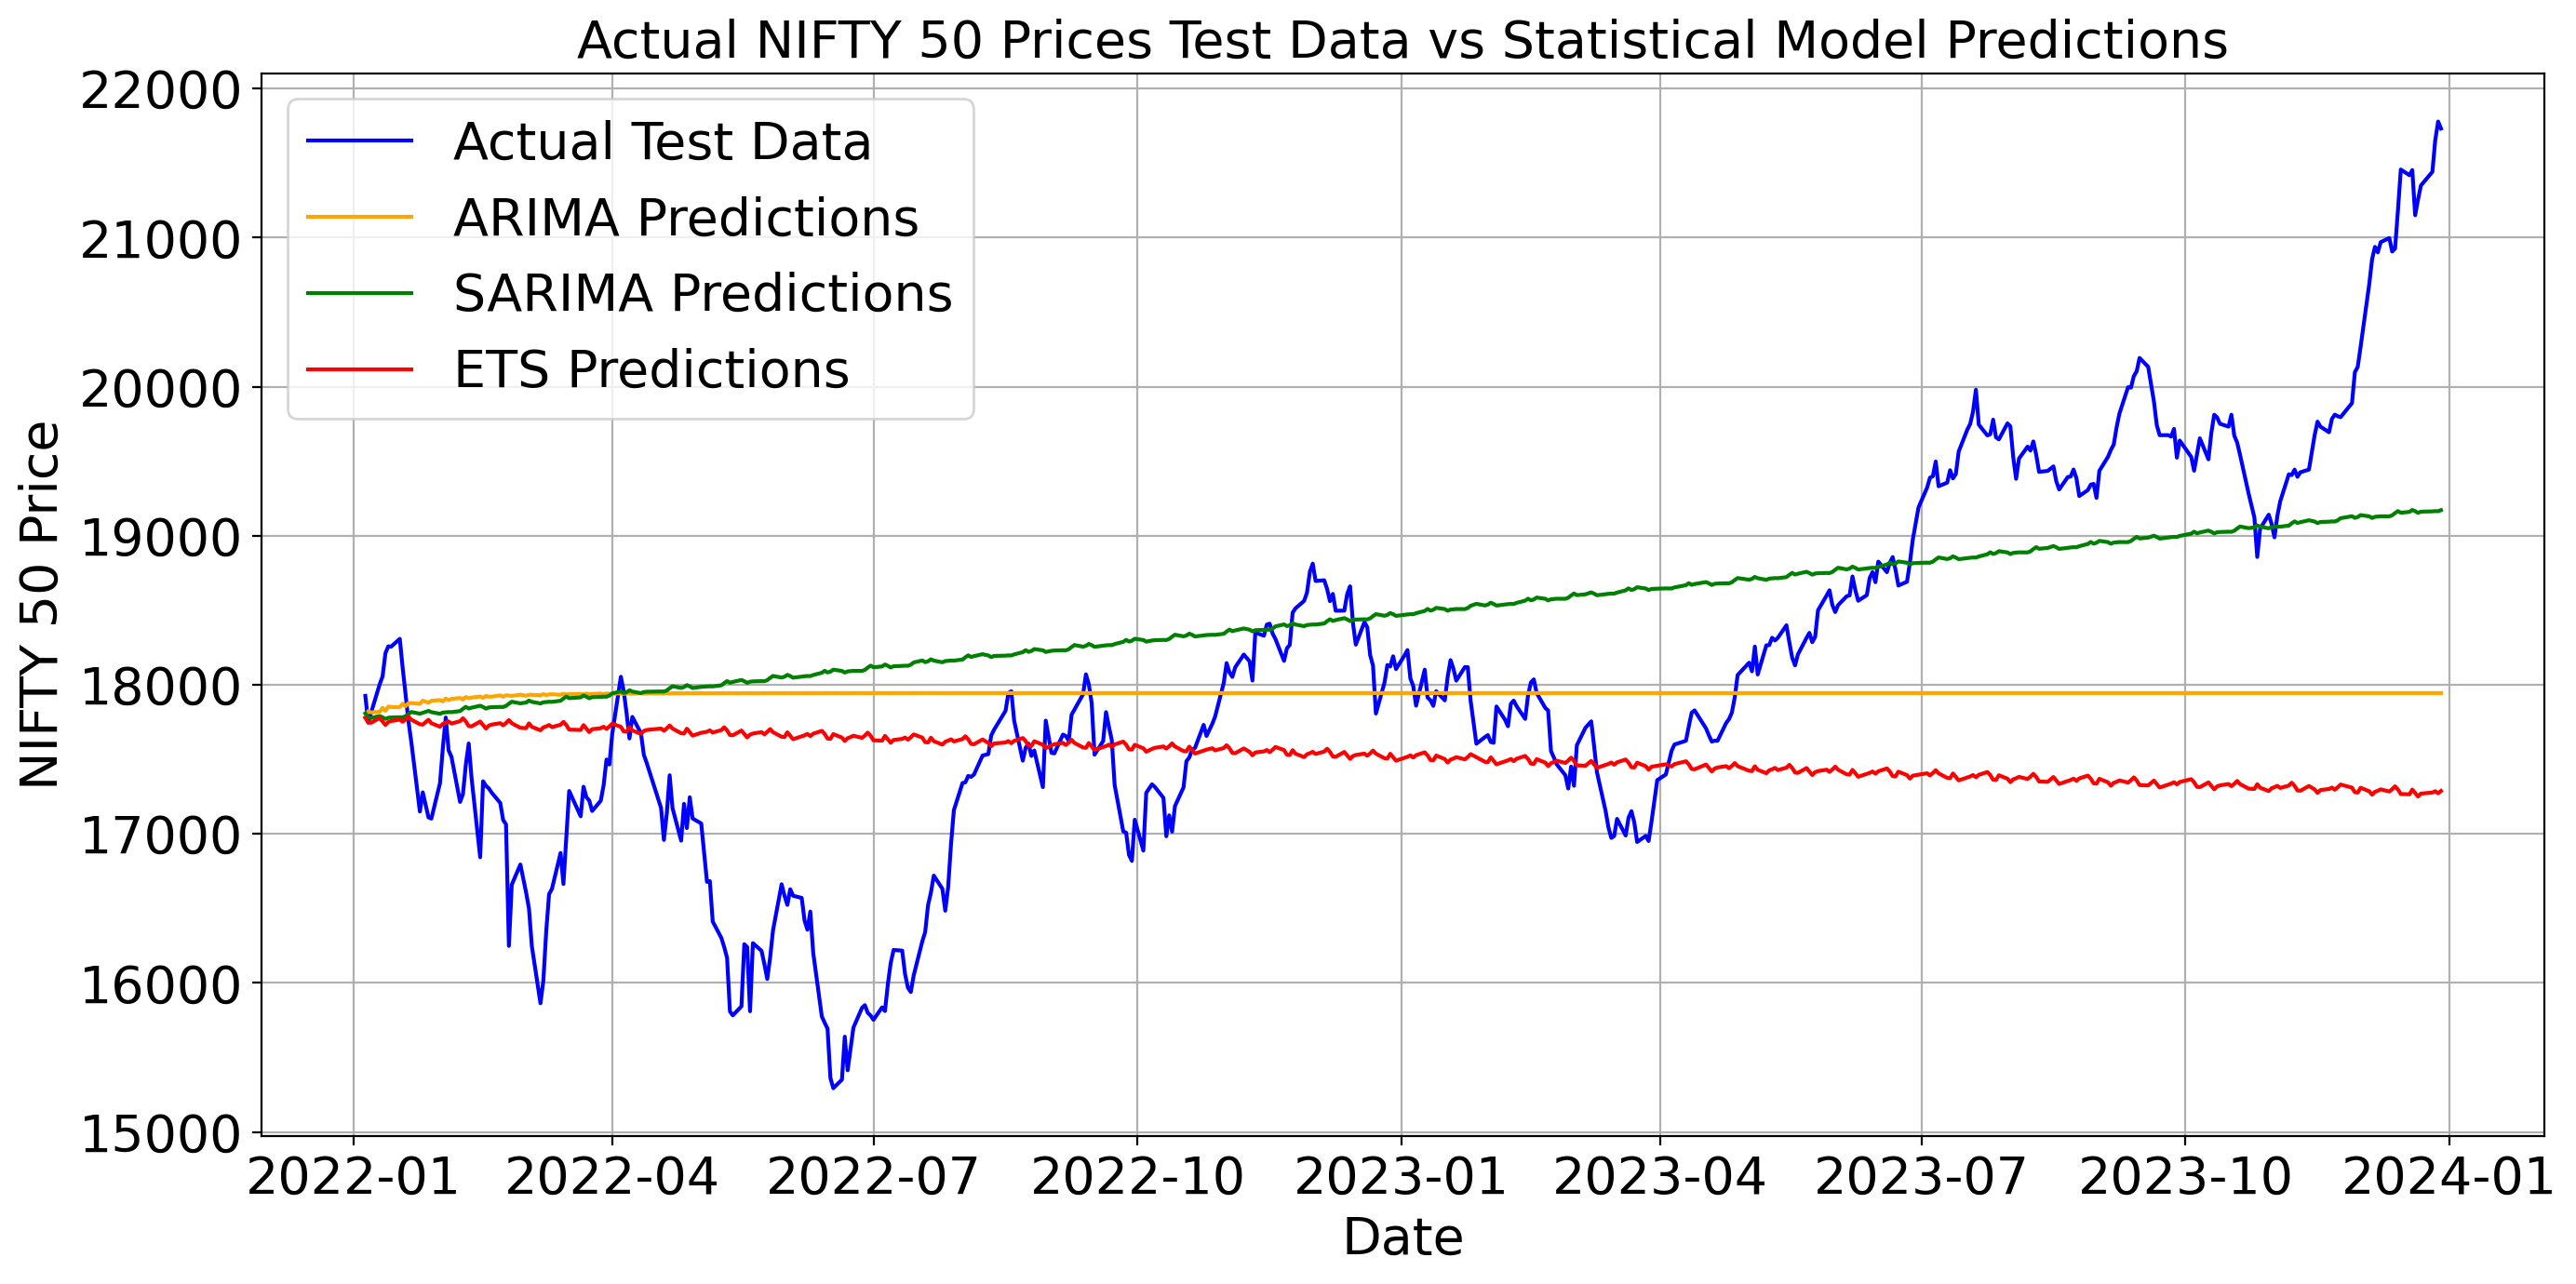

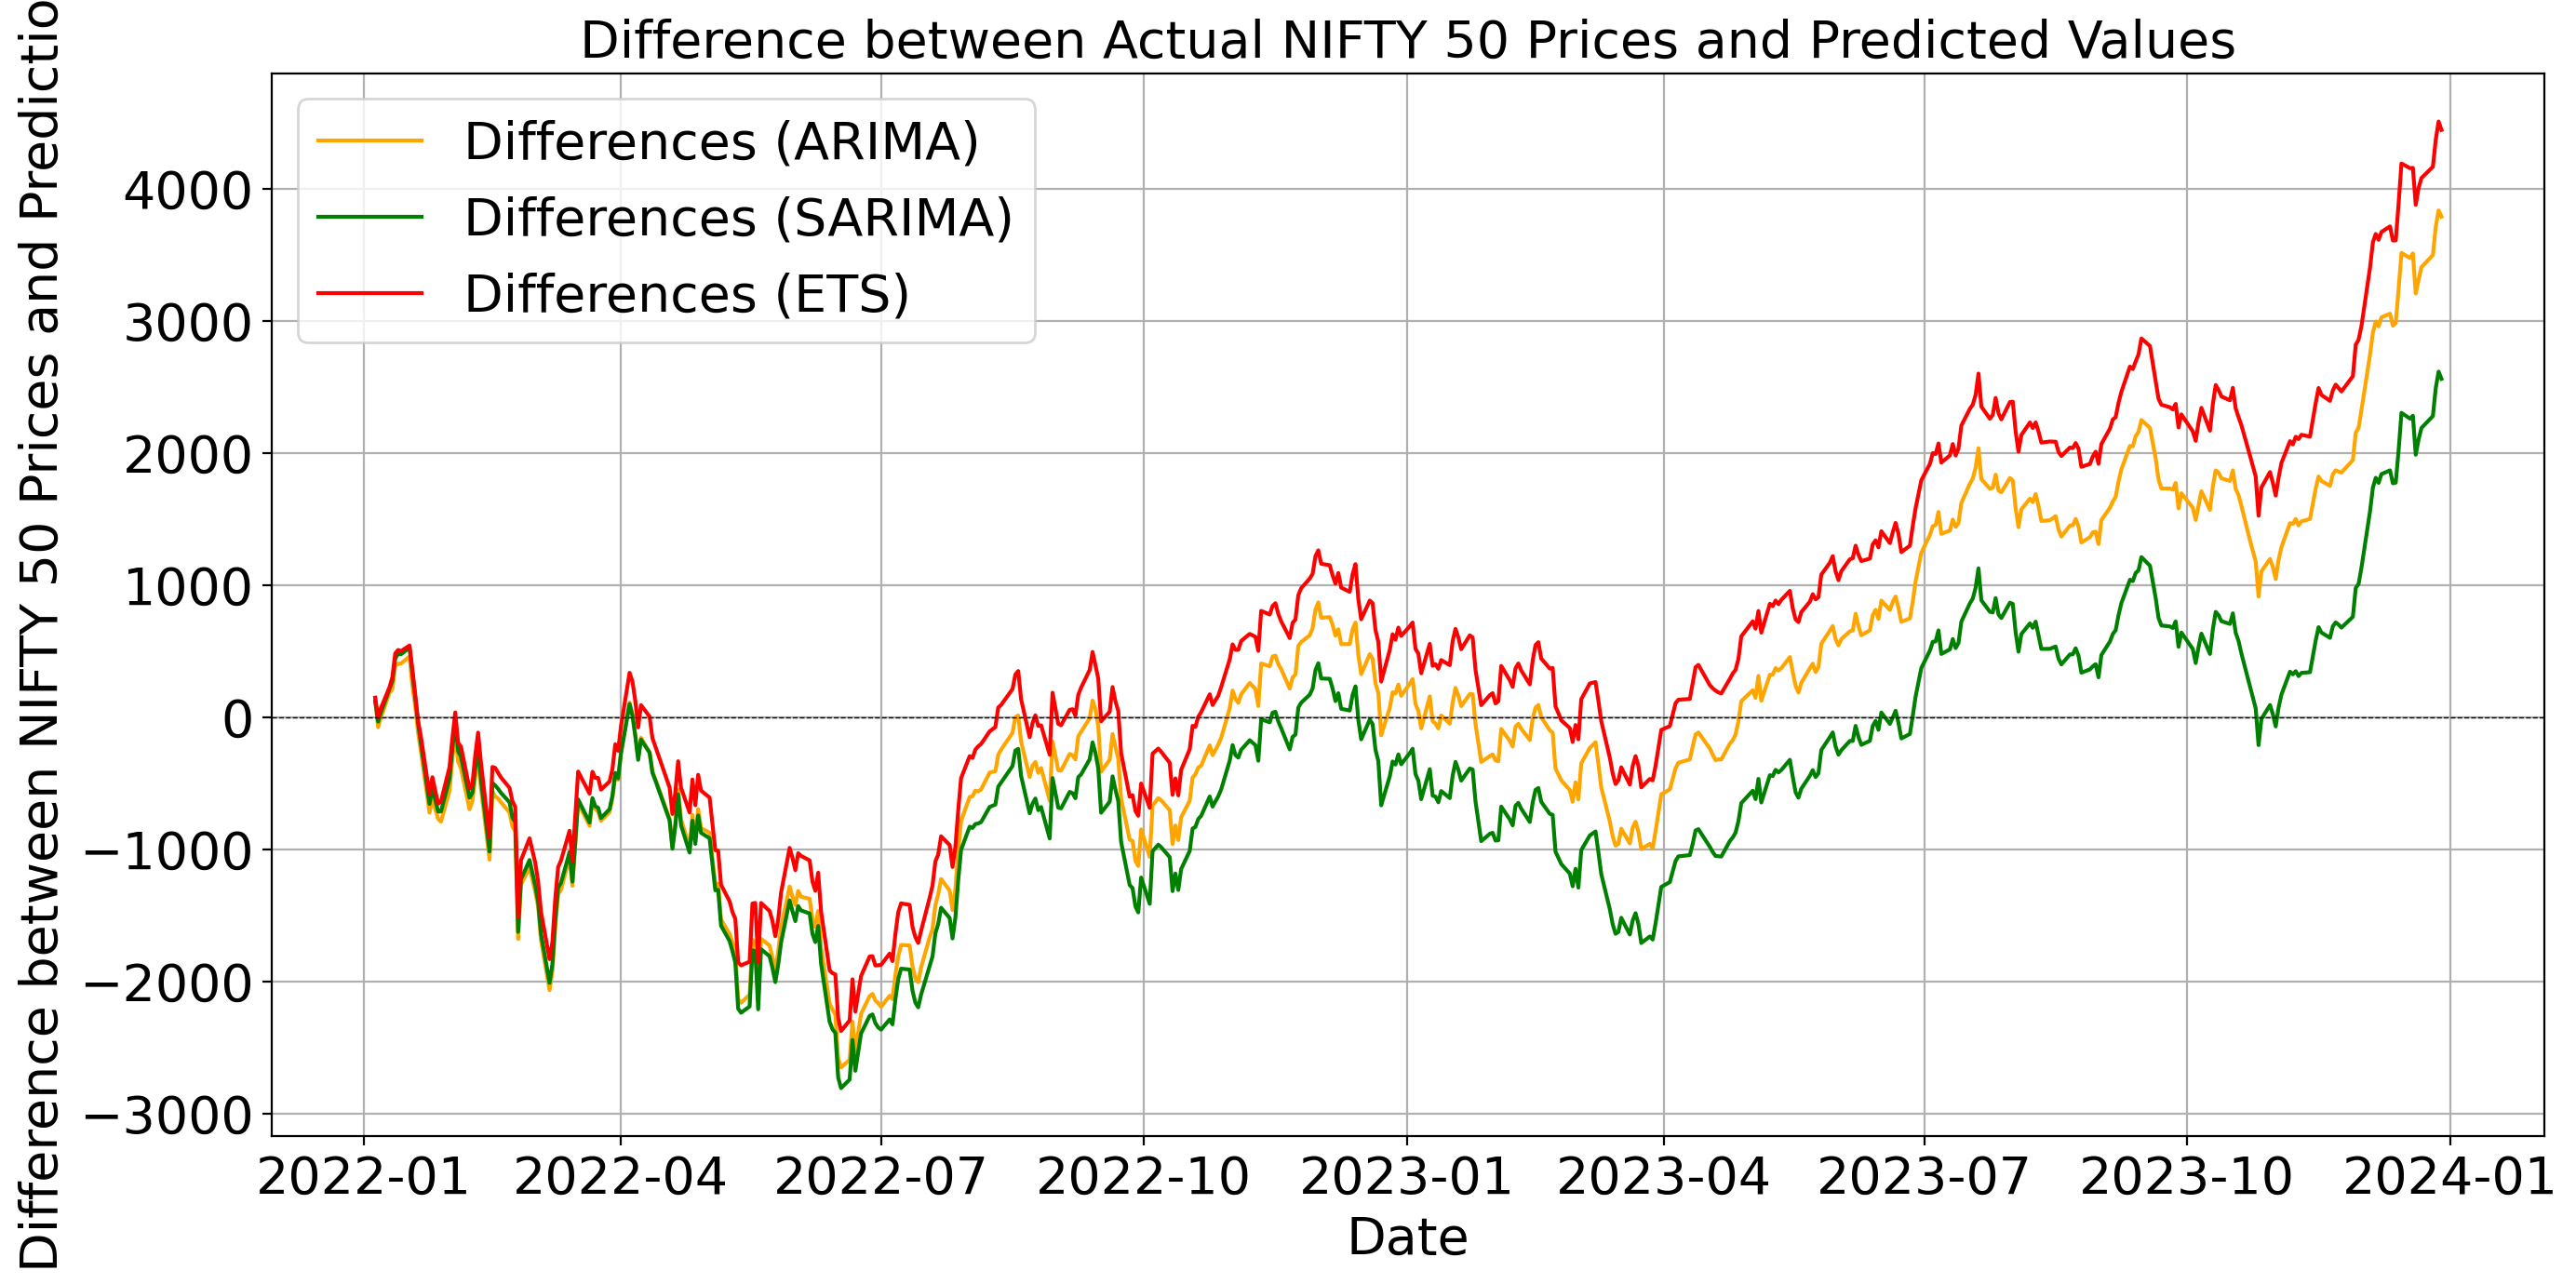

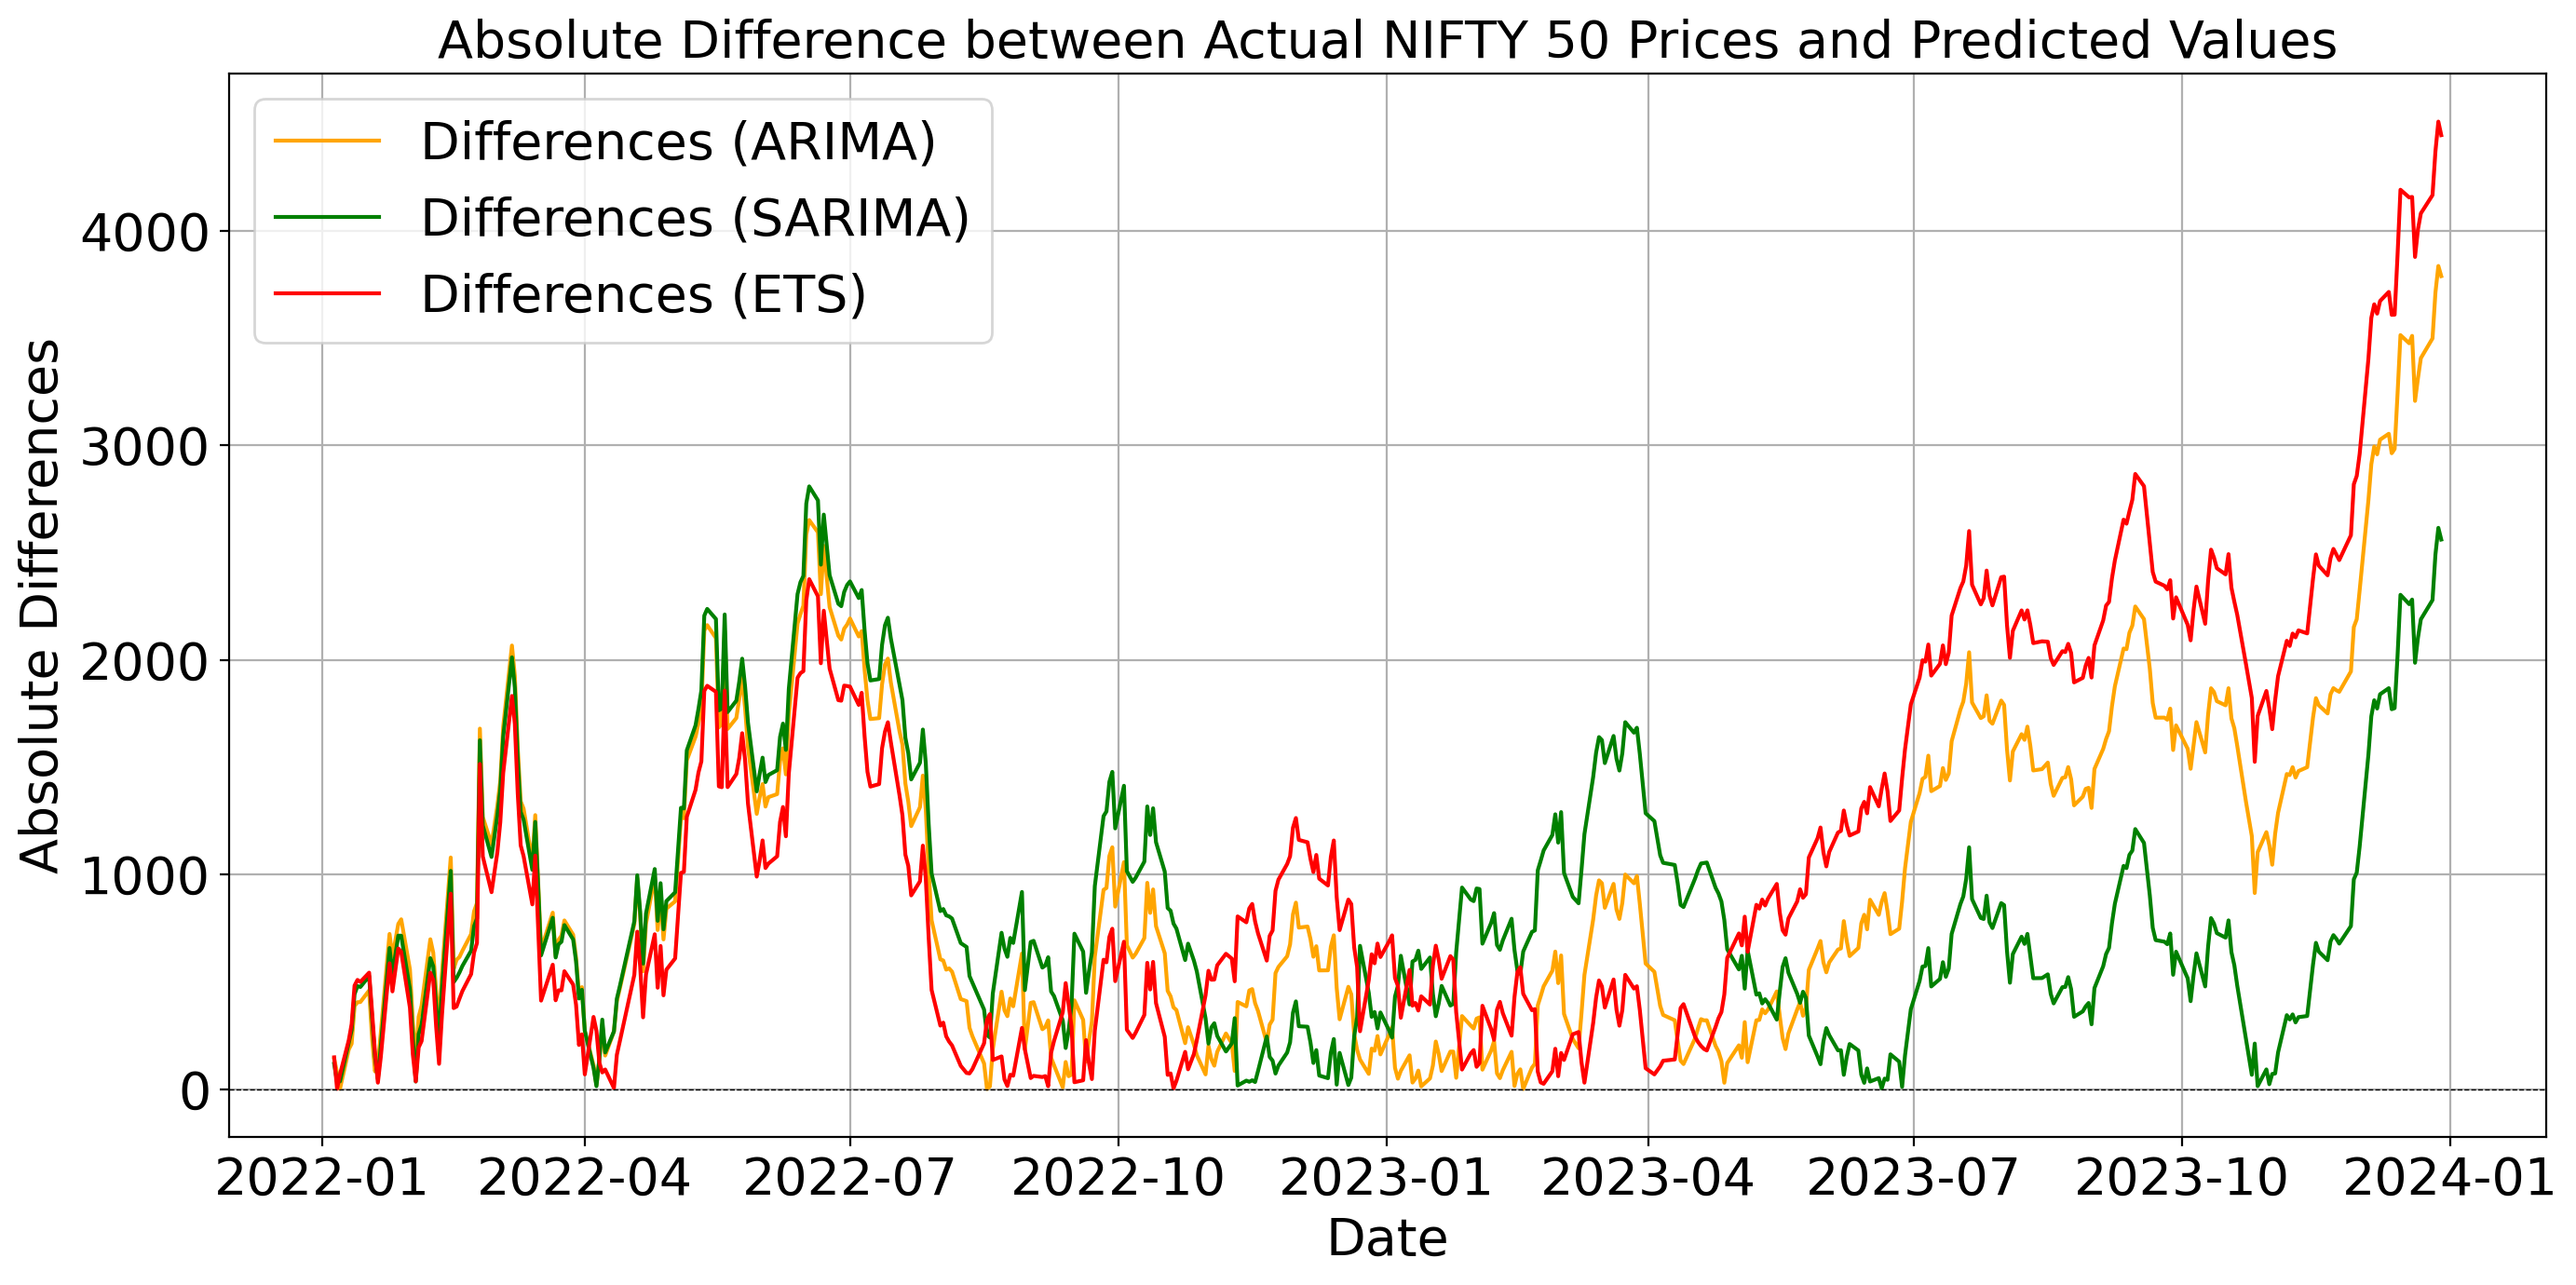

In [5]:
# Step 3: Plotting the results for the entire duration

# Plot actual vs predicted for ARIMA and save it as PDF
plt.figure(figsize=(14, 7), dpi=200)
plt.plot(data.index[:train_size], train.values, label='Train Data', color='#5aabcb')
plt.plot(data.index[train_size:], test.values, label='Test Data', color='blue')
plt.plot(test.index , arima_predictions, label='ARIMA Predictions', color='orange')
plt.plot(test.index , sarima_predictions, label='SARIMA Predictions', color='green')
plt.plot(test.index , ets_predictions, label='ETS Predictions', color='red')

plt.title('NIFTY 50 Price Forecasting Models', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('NIFTY 50 Price', fontsize=20)
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)  # Set tick label font size
plt.grid()
plt.tight_layout()
plt.savefig('nifty_forecasting_models.pdf') # Save the plot as PDF file


# Step 4: Create separate plots for predictions and differences

# Plotting Test Data with Predictions and saving it as PDF
plt.figure(figsize=(14, 7), dpi=200)
plt.plot(test.index, test.values, label='Actual Test Data', color='blue')
plt.plot(test.index, arima_predictions, label='ARIMA Predictions', color='orange')
plt.plot(test.index, sarima_predictions, label='SARIMA Predictions', color='green')
plt.plot(test.index, ets_predictions, label='ETS Predictions', color='red')

plt.title('Actual NIFTY 50 Prices Test Data vs Statistical Model Predictions', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('NIFTY 50 Price', fontsize=20)
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)  # Set tick label font size
plt.grid()
plt.tight_layout()
plt.savefig('test_data_vs_stats_predictions.pdf') # Save the plot as PDF file


# Plotting Differences between Actual and Predicted Values and saving it as PDF
differences_arima = test.values.flatten() - arima_predictions.values
differences_sarima = test.values.flatten() - sarima_predictions.values
differences_ets = test.values.flatten() - ets_predictions.values

plt.figure(figsize=(14, 7), dpi=200)
plt.plot(test.index, differences_arima, label='Differences (ARIMA)', color='orange')
plt.plot(test.index, differences_sarima, label='Differences (SARIMA)', color='green')
plt.plot(test.index, differences_ets, label='Differences (ETS)', color='red')

plt.title('Difference between Actual NIFTY 50 Prices and Predicted Values', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Difference between NIFTY 50 Prices and Predictions', fontsize=20)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)  # Set tick label font size
plt.grid()
plt.tight_layout()
plt.savefig('differences_between_actual_and_stats_predicted.pdf')


# Plotting Absolute Differences between Actual and Predicted Values and saving it as PDF
abs_differences_arima = np.abs(test.values.flatten() - arima_predictions.values)  # Apply np.abs() here
abs_differences_sarima = np.abs(test.values.flatten() - sarima_predictions.values)  # Apply np.abs() here
abs_differences_ets = np.abs(test.values.flatten() - ets_predictions.values)  # Apply np.abs() here

plt.figure(figsize=(14, 7), dpi=200)
plt.plot(test.index, abs_differences_arima, label='Differences (ARIMA)', color='orange')
plt.plot(test.index, abs_differences_sarima, label='Differences (SARIMA)', color='green')
plt.plot(test.index, abs_differences_ets, label='Differences (ETS)', color='red')

plt.title('Absolute Difference between Actual NIFTY 50 Prices and Predicted Values', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Absolute Differences', fontsize=20) # Update y-axis label
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)  # Set tick label font size
plt.grid()
plt.tight_layout()
plt.savefig('absolute_differences_between_actual_and_predicted.pdf')

## ML-DL Models: Random Forest, XGBoost, GRU, LSTM

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

# Step 1: Download Stock Data
ticker = "^NSEI"
data = yf.download(ticker, start="2014-01-01", end="2024-01-01")
data['Return'] = data['Close'].pct_change()
data.dropna(inplace=True)

# Step 2: Feature Engineering
def create_features(data, lag=10):
    df = pd.DataFrame(data['Close'])
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = data['Close'].shift(i)
    df['rolling_mean'] = data['Close'].rolling(window=lag).mean()
    df['rolling_std'] = data['Close'].rolling(window=lag).std()
    df['momentum'] = data['Close'] - data['Close'].shift(lag)
    df['volatility'] = data['Return'].rolling(window=lag).std()
    return df.dropna()


features = create_features(data, lag=10)
X, y = features.drop(columns=['Close']), features['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Step 3: Train Models
# Random Forest
rf_model = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train_scaled)
rf_predictions_scaled = rf_model.predict(X_test_scaled)
rf_predictions = scaler_y.inverse_transform(rf_predictions_scaled.reshape(-1, 1)).flatten()

# XGBoost
xgb_model = XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, subsample=0.9, random_state=42)
xgb_model.fit(X_train_scaled, y_train_scaled)
xgb_predictions_scaled = xgb_model.predict(X_test_scaled)
xgb_predictions = scaler_y.inverse_transform(xgb_predictions_scaled.reshape(-1, 1)).flatten()

# Step 4: Evaluate and Visualize Results
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_predictions)))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_predictions)))

# Plot Actual vs Predictions
plt.figure(figsize=(14, 8))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(rf_predictions, label='Random Forest', linestyle='dotted')
plt.plot(xgb_predictions, label='XGBoost', linestyle='dashed')
plt.legend()
plt.title('Model Predictions vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()

[*********************100%***********************]  1 of 1 completed


KeyError: "['Close'] not found in axis"

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

# Step 1: Import stock data
ticker = "^NSEI"
data = yf.download(ticker, start="2014-01-01", end="2024-01-01")
data['Return'] = data['Close'].pct_change()
data.dropna(inplace=True)

"""# Step 2: Prepare the dataset
def create_supervised_data(series, lag=1):
    series = series.squeeze()
    df = pd.DataFrame({'t': series.values}, index=series.index)
    for i in range(1, lag + 1):
        df[f't-{i}'] = series.shift(i).values
    return df.dropna()

lag = 10  # Increase lag for more context
supervised_data = create_supervised_data(data['Close'], lag)
X, y = supervised_data.drop(columns=['t']), supervised_data['t']

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]"""

# Step 2: Feature Engineering
def create_features(data, lag=10):
    df = pd.DataFrame(data['Close'])
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = data['Close'].shift(i)
    df['rolling_mean'] = data['Close'].rolling(window=lag).mean()
    df['rolling_std'] = data['Close'].rolling(window=lag).std()
    df['momentum'] = data['Close'] - data['Close'].shift(lag)
    df['volatility'] = data['Return'].rolling(window=lag).std()
    return df.dropna()


features = create_features(data, lag=10)
X, y = features.drop(columns=['Close']), features['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Reshaping for LSTM/GRU
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], lag, 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], lag, 1)

# Step 3: Fine-Tuning and Model Training
ML_model_metrics = {}

# Random Forest
rf_param_grid = {
    'n_estimators': [100, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 4, 5, 6, 7],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]
}
rf_model = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, scoring='neg_mean_squared_error', cv=3)
rf_model.fit(X_train, y_train)
rf_best_model = rf_model.best_estimator_

# Measure only the time required to train on the best hyperparameters
start_time = time.time()
rf_best_model.fit(X_train, y_train)
rf_train_time = time.time() - start_time

rf_predictions = rf_best_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
ML_model_metrics['Random Forest'] = {'MSE': rf_mse, 'RMSE': rf_rmse, 'Best Params': rf_model.best_params_, 'Time (s)': rf_train_time}

# XGBoost
xgb_param_grid = {
    'n_estimators': [100, 180, 185, 190, 195, 200, 210],
    'learning_rate': [0.2, 0.25, 0.3, 0.35, 0.4],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.8, 0.85, 0.9, 0.95, 1.0]
}
xgb_model = GridSearchCV(XGBRegressor(random_state=42), xgb_param_grid, scoring='neg_mean_squared_error', cv=3)
xgb_model.fit(X_train, y_train)
xgb_best_model = xgb_model.best_estimator_

start_time = time.time()
xgb_best_model.fit(X_train, y_train)
xgb_train_time = time.time() - start_time

xgb_predictions = xgb_best_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
ML_model_metrics['XGBoost'] = {'MSE': xgb_mse, 'RMSE': xgb_rmse, 'Best Params': xgb_model.best_params_, 'Time (s)': xgb_train_time}

# GRU
gru_model = Sequential([
    GRU(50, input_shape=(lag, 1), return_sequences=True),
    Dropout(0.2),
    GRU(50, return_sequences=False),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

start_time = time.time()
gru_model.fit(X_train_reshaped, y_train_scaled, validation_split=0.1, epochs=50, batch_size=32, verbose=1,
              callbacks=[early_stopping])
gru_train_time = time.time() - start_time

gru_predictions_scaled = gru_model.predict(X_test_reshaped).flatten()
gru_predictions = scaler_y.inverse_transform(gru_predictions_scaled.reshape(-1, 1)).flatten()
gru_mse = mean_squared_error(y_test, gru_predictions)
gru_rmse = np.sqrt(gru_mse)
ML_model_metrics['GRU'] = {'MSE': gru_mse, 'RMSE': gru_rmse, 'Time (s)': gru_train_time}

# LSTM
lstm_model = Sequential([
    LSTM(50, input_shape=(lag, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

start_time = time.time()
lstm_model.fit(X_train_reshaped, y_train_scaled, validation_split=0.1, epochs=50,
               batch_size=32, verbose=1,
               callbacks=[early_stopping])
lstm_train_time = time.time() - start_time

lstm_predictions_scaled = lstm_model.predict(X_test_reshaped).flatten()
lstm_predictions = scaler_y.inverse_transform(lstm_predictions_scaled.reshape(-1, 1)).flatten()
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
ML_model_metrics['LSTM'] = {'MSE': lstm_mse, 'RMSE': lstm_rmse, 'Time (s)': lstm_train_time}

# Step 4: Save Metrics and Results
metrics_ML_df = pd.DataFrame(ML_model_metrics).T
metrics_ML_df.to_csv('Timed_ML_model_metrics_fine_tuned.csv', index=True)

print("Model metrics (excluding hyperparameter tuning time) saved to 'Timed_ML_model_metrics_fine_tuned.csv'")

# Save predictions in a DataFrame with the corresponding time
predictions_df = pd.DataFrame({
    'Time': X_test.index,  # Assuming X_test.index contains the time information
    'Actual': y_test,
    'Random Forest': rf_predictions,
    'XGBoost': xgb_predictions,
    'GRU': gru_predictions,
    'LSTM': lstm_predictions
})

# Save predictions to a CSV file
predictions_df.to_csv('Model_Predictions.csv', index=False)
print("Predictions saved to 'Model_Predictions.csv'")

[*********************100%***********************]  1 of 1 completed


NameError: name 'lag' is not defined

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

# Step 1: Import stock data
ticker = "^NSEI"
data1 = yf.download(ticker, start="2014-01-01", end="2024-01-01")
data = data1.copy()
column_names = [col[0] for col in data1.columns]
data.columns = column_names

data['Return'] = data['Close'].pct_change()
data.dropna(inplace=True)

"""# Step 2: Prepare the dataset
def create_supervised_data(series, lag=1):
    series = series.squeeze()
    df = pd.DataFrame({'t': series.values}, index=series.index)
    for i in range(1, lag + 1):
        df[f't-{i}'] = series.shift(i).values
    return df.dropna()"""

# Step 2: Feature Engineering
def create_supervised_data(data, lag=10):
    df = pd.DataFrame(data['Close'])
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = data['Close'].shift(i)
    df['rolling_mean'] = data['Close'].rolling(window=lag).mean()
    df['rolling_std'] = data['Close'].rolling(window=lag).std()
    df['momentum'] = data['Close'] - data['Close'].shift(lag)
    df['volatility'] = data['Return'].rolling(window=lag).std()
    return df.dropna()

lag = 10  # Increase lag for more context
supervised_data = create_supervised_data(data, lag)
X, y = supervised_data.drop(columns=['Close']), supervised_data['Close']

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Reshaping for LSTM/GRU
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], lag, 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], lag, 1)

# Step 3: Fine-Tuning and Model Training
ML_model_metrics = {}

# Random Forest
rf_param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

"""# Random Forest
rf_param_grid = {
    'n_estimators': [100, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 4, 5, 6, 7],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]
}"""

rf_model = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, scoring='neg_mean_squared_error', cv=3)
rf_model.fit(X_train, y_train)
rf_best_model = rf_model.best_estimator_

# Measure only the time required to train on the best hyperparameters
start_time = time.time()
rf_best_model.fit(X_train, y_train)
rf_train_time = time.time() - start_time

rf_predictions = rf_best_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
ML_model_metrics['Random Forest'] = {'MSE': rf_mse, 'RMSE': rf_rmse, 'Best Params': rf_model.best_params_, 'Time (s)': rf_train_time}

"""# XGBoost
xgb_param_grid = {
    'n_estimators': [100, 180, 185, 190, 195, 200, 210],
    'learning_rate': [0.2, 0.25, 0.3, 0.35, 0.4],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.8, 0.85, 0.9, 0.95, 1.0]
}"""

# XGBoost
xgb_param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.2],
    'max_depth': [3],
    'subsample': [0.8]
}

xgb_model = GridSearchCV(XGBRegressor(random_state=42), xgb_param_grid, scoring='neg_mean_squared_error', cv=3)
xgb_model.fit(X_train, y_train)
xgb_best_model = xgb_model.best_estimator_

start_time = time.time()
xgb_best_model.fit(X_train, y_train)
xgb_train_time = time.time() - start_time

xgb_predictions = xgb_best_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
ML_model_metrics['XGBoost'] = {'MSE': xgb_mse, 'RMSE': xgb_rmse, 'Best Params': xgb_model.best_params_, 'Time (s)': xgb_train_time}

# GRU
gru_model = Sequential([
    GRU(50, input_shape=(lag, 1), return_sequences=True),
    Dropout(0.2),
    GRU(50, return_sequences=False),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

start_time = time.time()
gru_model.fit(X_train_reshaped, y_train_scaled, validation_split=0.1, epochs=50, batch_size=32, verbose=1,
              callbacks=[early_stopping])
gru_train_time = time.time() - start_time

gru_predictions_scaled = gru_model.predict(X_test_reshaped).flatten()
gru_predictions = scaler_y.inverse_transform(gru_predictions_scaled.reshape(-1, 1)).flatten()
gru_mse = mean_squared_error(y_test, gru_predictions)
gru_rmse = np.sqrt(gru_mse)
ML_model_metrics['GRU'] = {'MSE': gru_mse, 'RMSE': gru_rmse, 'Time (s)': gru_train_time}

# LSTM
lstm_model = Sequential([
    LSTM(50, input_shape=(lag, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

start_time = time.time()
lstm_model.fit(X_train_reshaped, y_train_scaled, validation_split=0.1, epochs=50,
               batch_size=32, verbose=1,
               callbacks=[early_stopping])
lstm_train_time = time.time() - start_time

lstm_predictions_scaled = lstm_model.predict(X_test_reshaped).flatten()
lstm_predictions = scaler_y.inverse_transform(lstm_predictions_scaled.reshape(-1, 1)).flatten()
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
ML_model_metrics['LSTM'] = {'MSE': lstm_mse, 'RMSE': lstm_rmse, 'Time (s)': lstm_train_time}

# Step 4: Save Metrics and Results
metrics_ML_df = pd.DataFrame(ML_model_metrics).T
metrics_ML_df.to_csv('Timed_ML_model_metrics_fine_tuned.csv', index=True)

print("Model metrics (excluding hyperparameter tuning time) saved to 'Timed_ML_model_metrics_fine_tuned.csv'")

# Save predictions in a DataFrame with the corresponding time
predictions_df = pd.DataFrame({
    'Time': X_test.index,  # Assuming X_test.index contains the time information
    'Actual': y_test,
    'Random Forest': rf_predictions,
    'XGBoost': xgb_predictions,
    'GRU': gru_predictions,
    'LSTM': lstm_predictions
})

# Save predictions to a CSV file
predictions_df.to_csv('Model_Predictions.csv', index=False)
print("Predictions saved to 'Model_Predictions.csv'")

[*********************100%***********************]  1 of 1 completed


ValueError: cannot reshape array of size 27342 into shape (1953,10,1)

In [18]:
# Step 1: Import stock data
ticker = "^NSEI"
data1 = yf.download(ticker, start="2014-01-01", end="2024-01-01")
data = data1.copy()
column_names = [col[0] for col in data1.columns]
data.columns = column_names
data


[*********************100%***********************]  1 of 1 completed


Adj Close         Close          High  \
Date                                                                  
2014-01-02 00:00:00+00:00   6221.149902   6221.149902   6358.299805   
2014-01-03 00:00:00+00:00   6211.149902   6211.149902   6221.700195   
2014-01-06 00:00:00+00:00   6191.450195   6191.450195   6224.700195   
2014-01-07 00:00:00+00:00   6162.250000   6162.250000   6221.500000   
2014-01-08 00:00:00+00:00   6174.600098   6174.600098   6192.100098   
...                                 ...           ...           ...   
2023-12-22 00:00:00+00:00  21349.400391  21349.400391  21390.500000   
2023-12-26 00:00:00+00:00  21441.349609  21441.349609  21477.150391   
2023-12-27 00:00:00+00:00  21654.750000  21654.750000  21675.750000   
2023-12-28 00:00:00+00:00  21778.699219  21778.699219  21801.449219   
2023-12-29 00:00:00+00:00  21731.400391  21731.400391  21770.300781   

                                    Low          Open  Volume  
Date                                                           
2014-01-02 00:00:00+00:00   6211.299805   6301.250000  158100  
2014-01-03 00:00:00+00:00   6171.250000   6194.549805  139000  
2014-01-06 00:00:00+00:00   6170.250000   6220.850098  118300  
2014-01-07 00:00:00+00:00   6144.750000   6203.899902  138600  
2014-01-08 00:00:00+00:00   6160.350098   6178.049805  146900  
...                                 ...           ...     ...  
2023-12-22 00:00:00+00:00  21232.449219  21295.849609  284700  
2023-12-26 00:00:00+00:00  21329.449219  21365.199219  219500  
2023-12-27 00:00:00+00:00  21495.800781  21497.650391  256500  
2023-12-28 00:00:00+00:00  21678.000000  21715.000000  393100  
2023-12-29 00:00:00+00:00  21676.900391  21737.650391  270900  

[2453 rows x 6 columns]

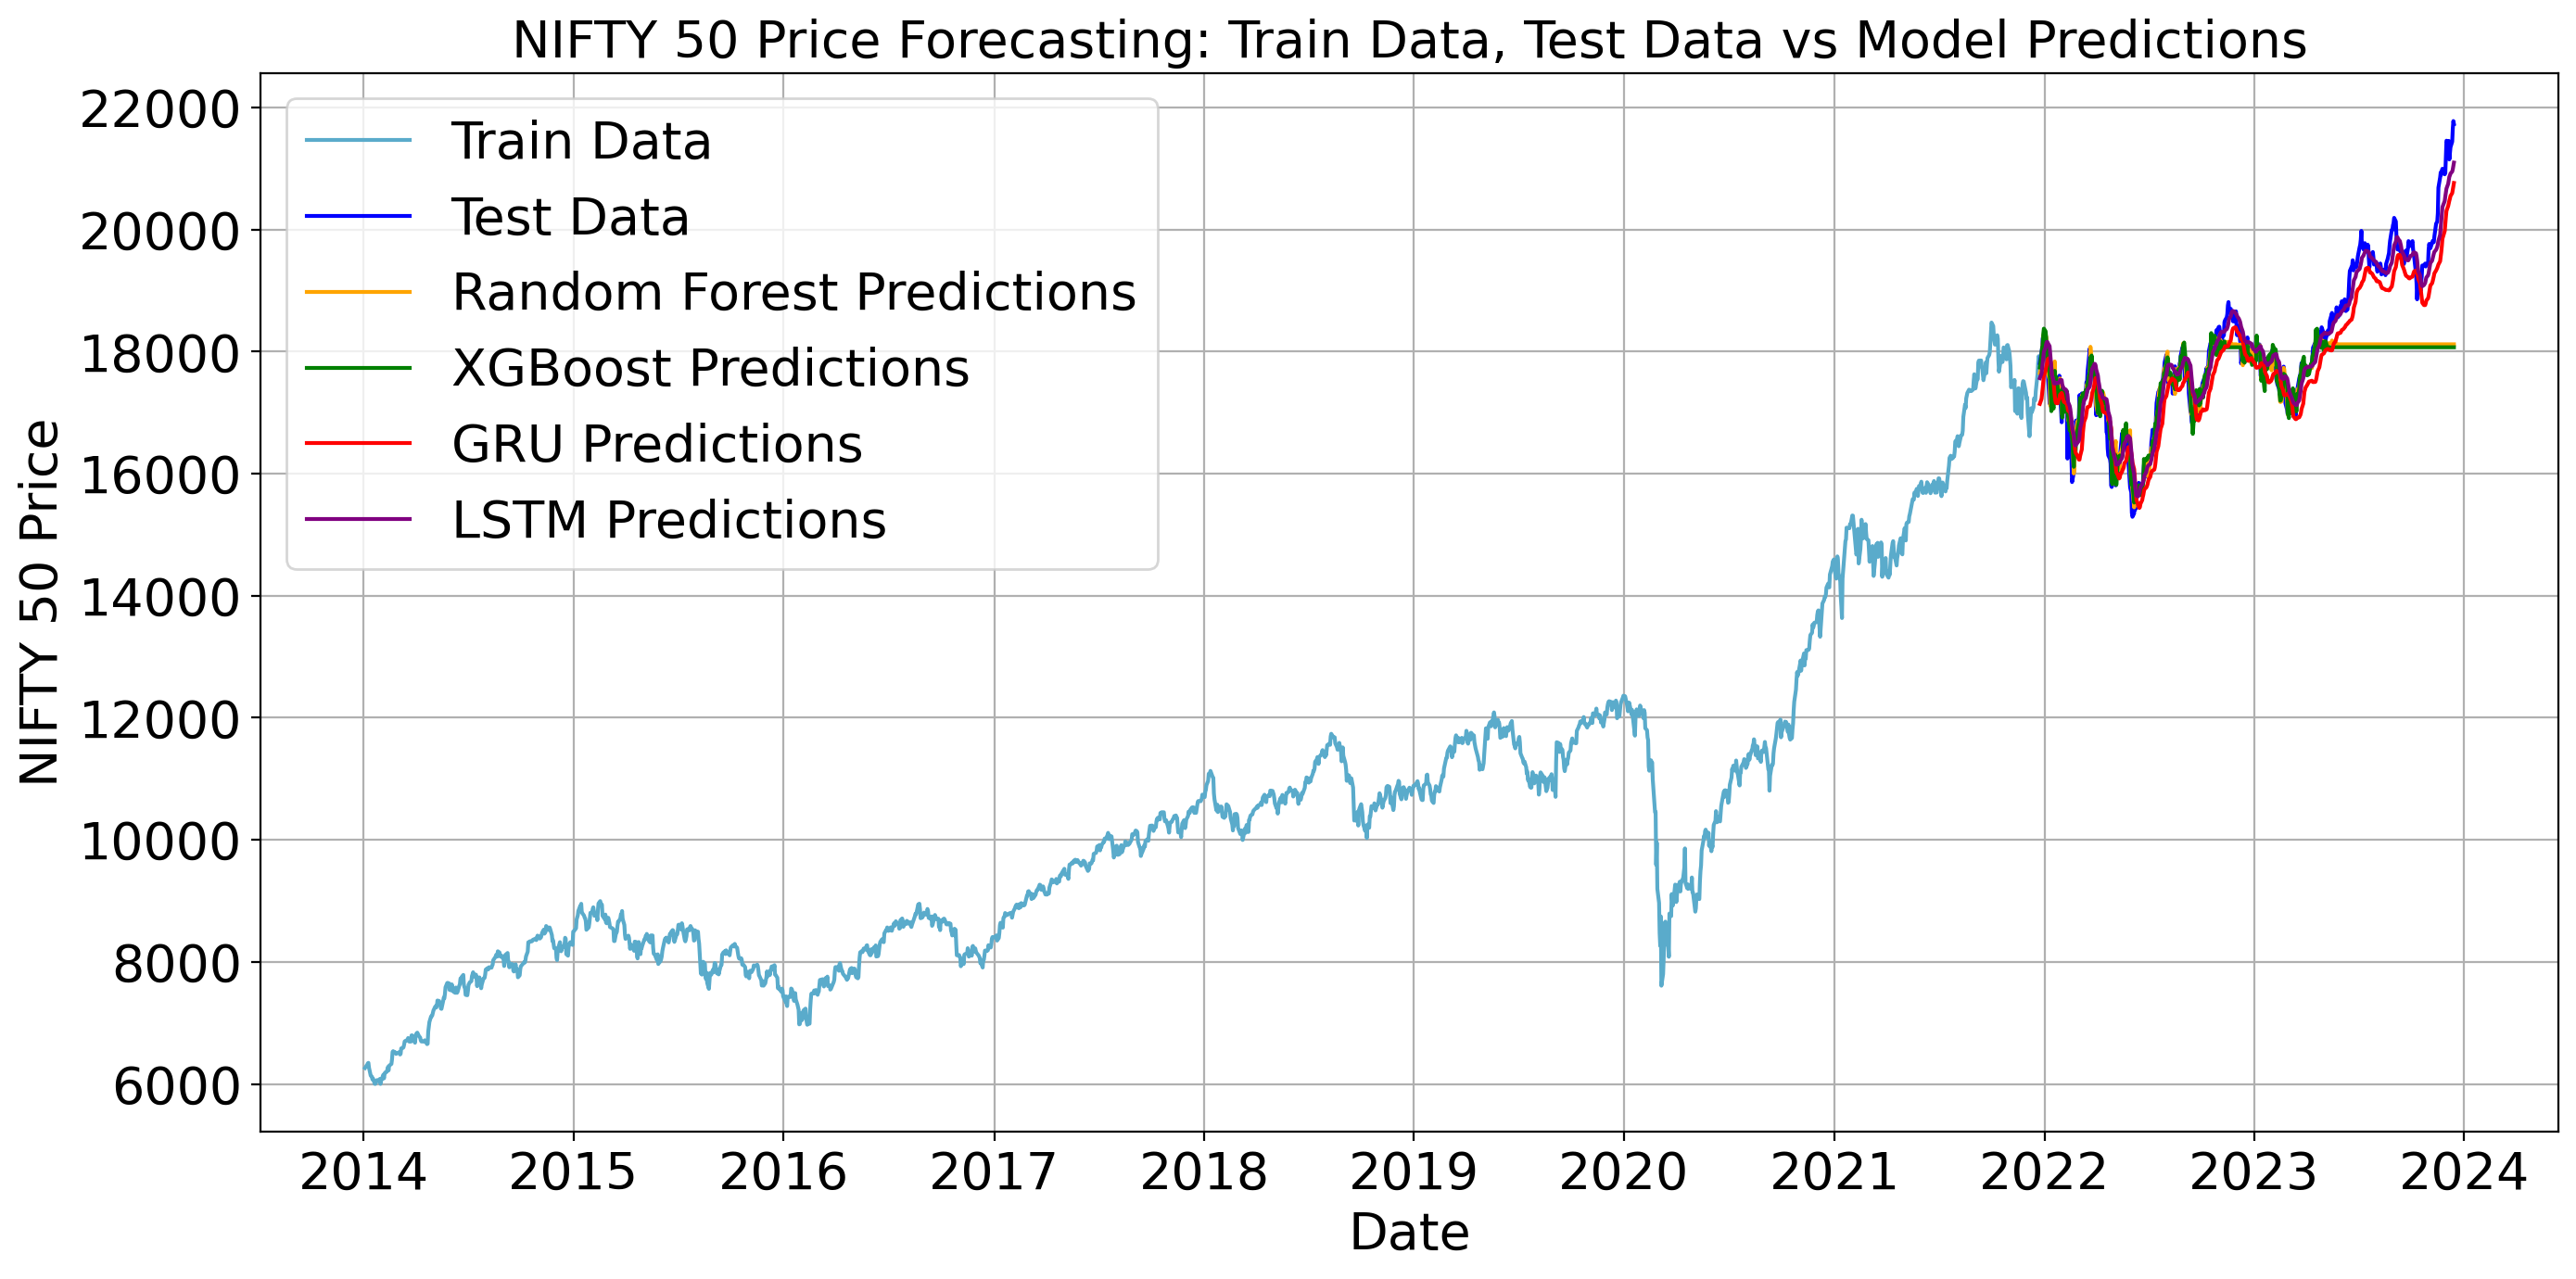

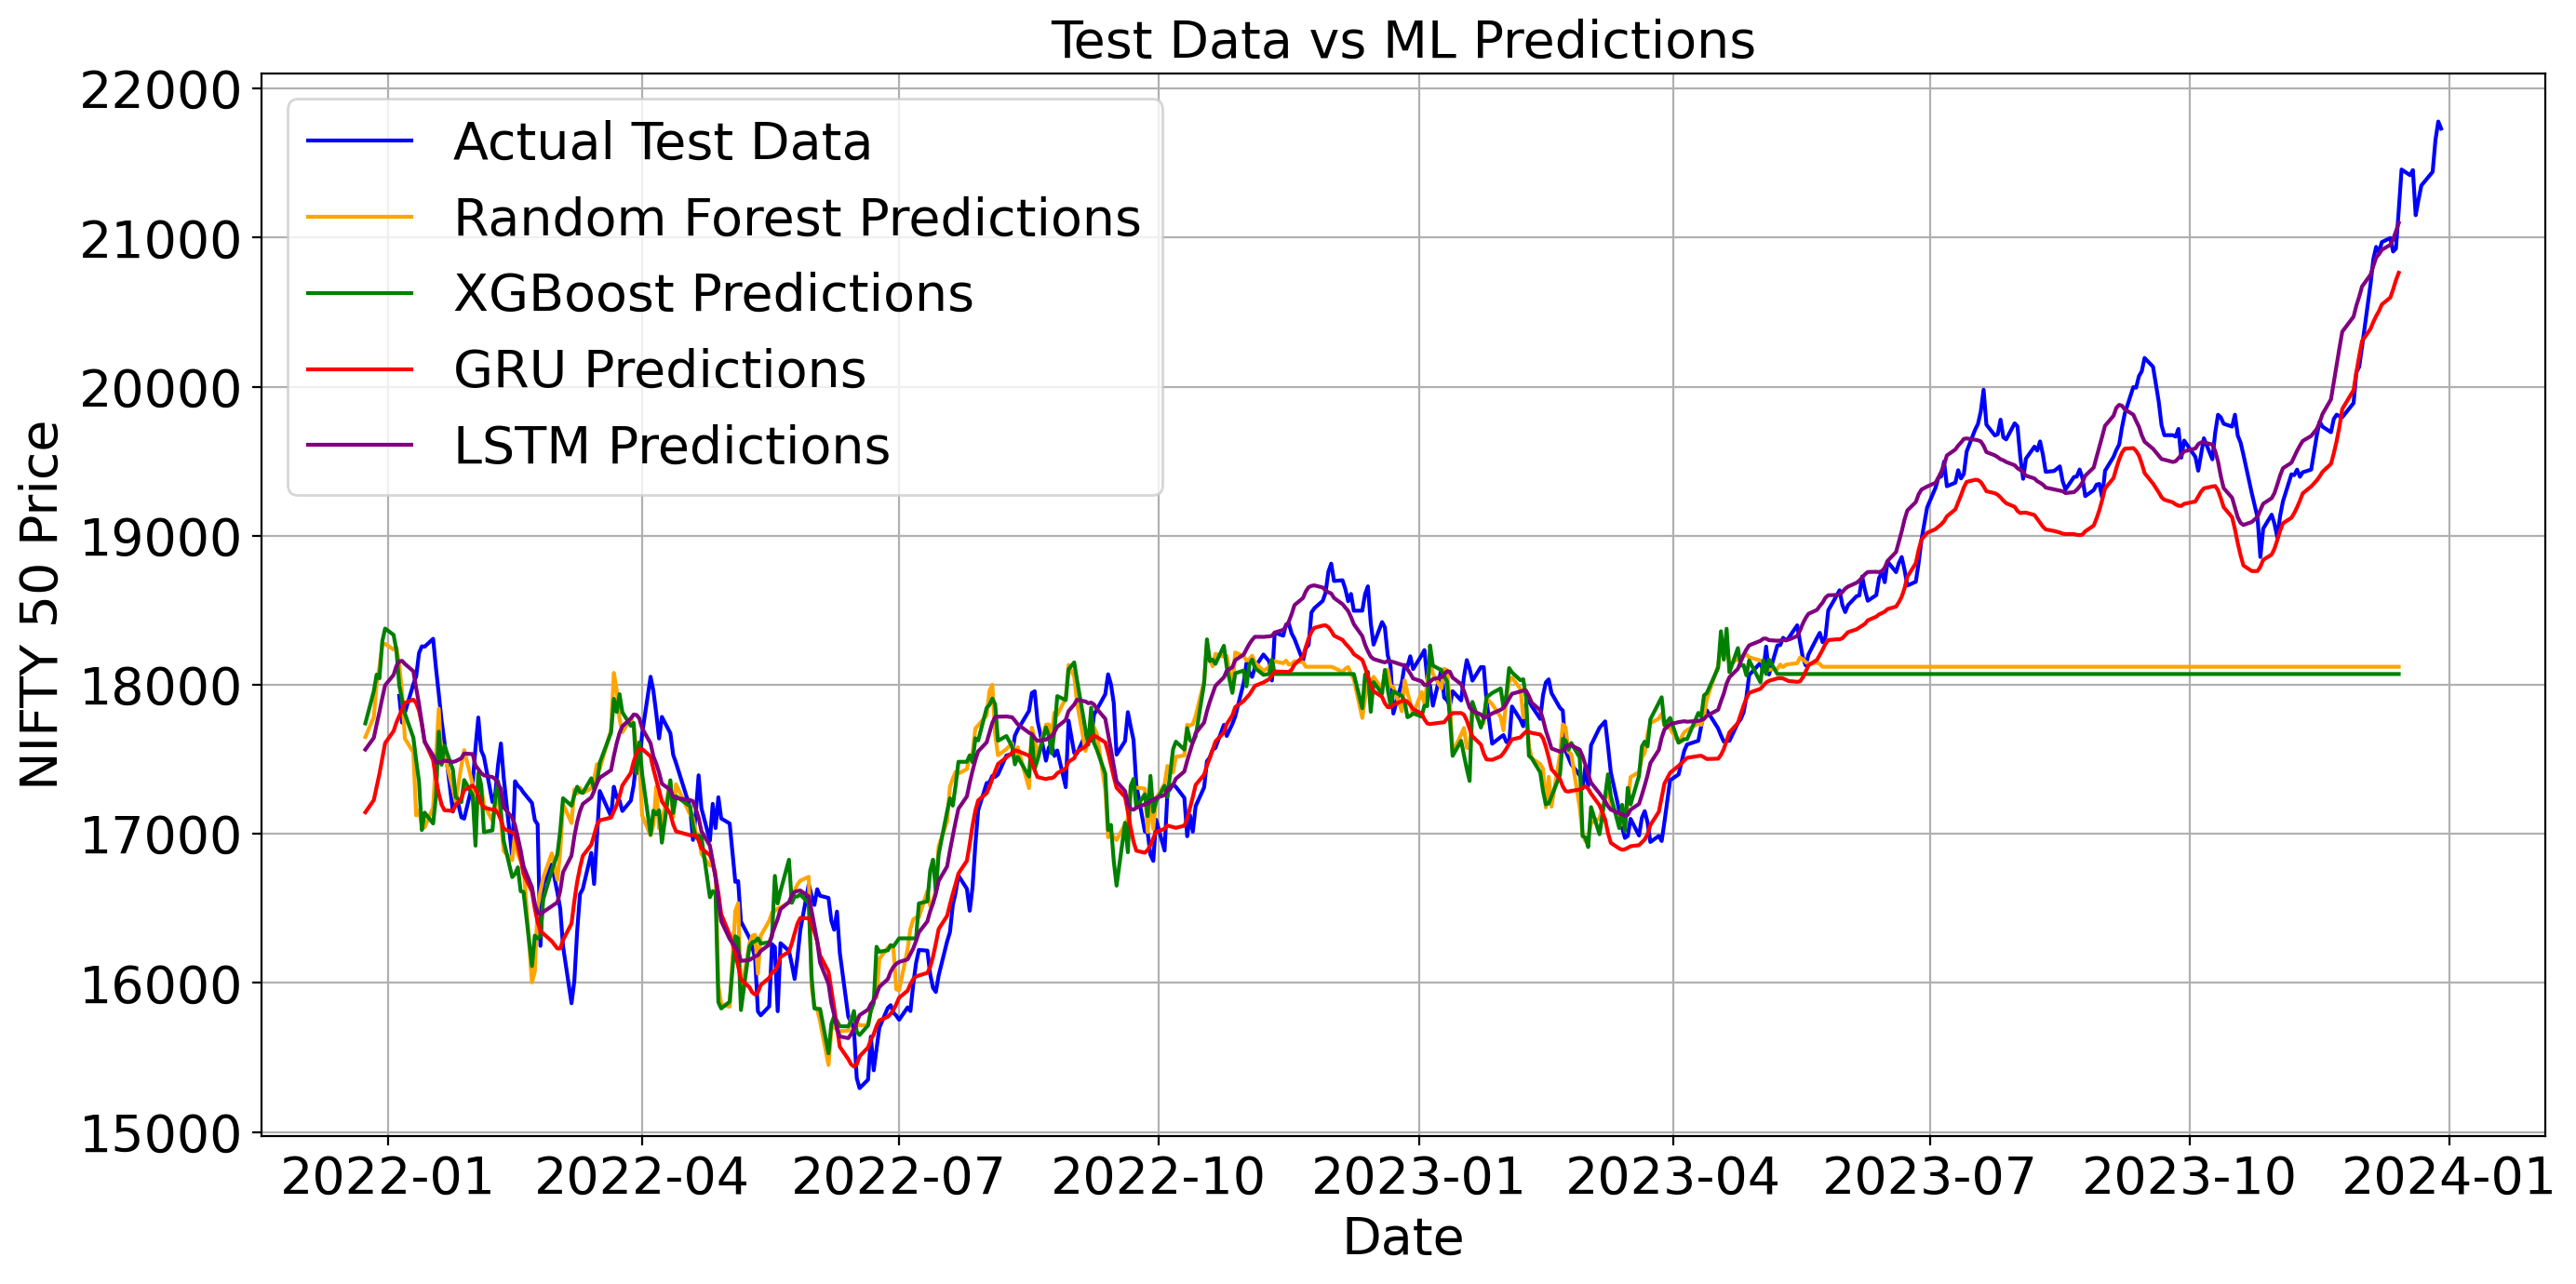

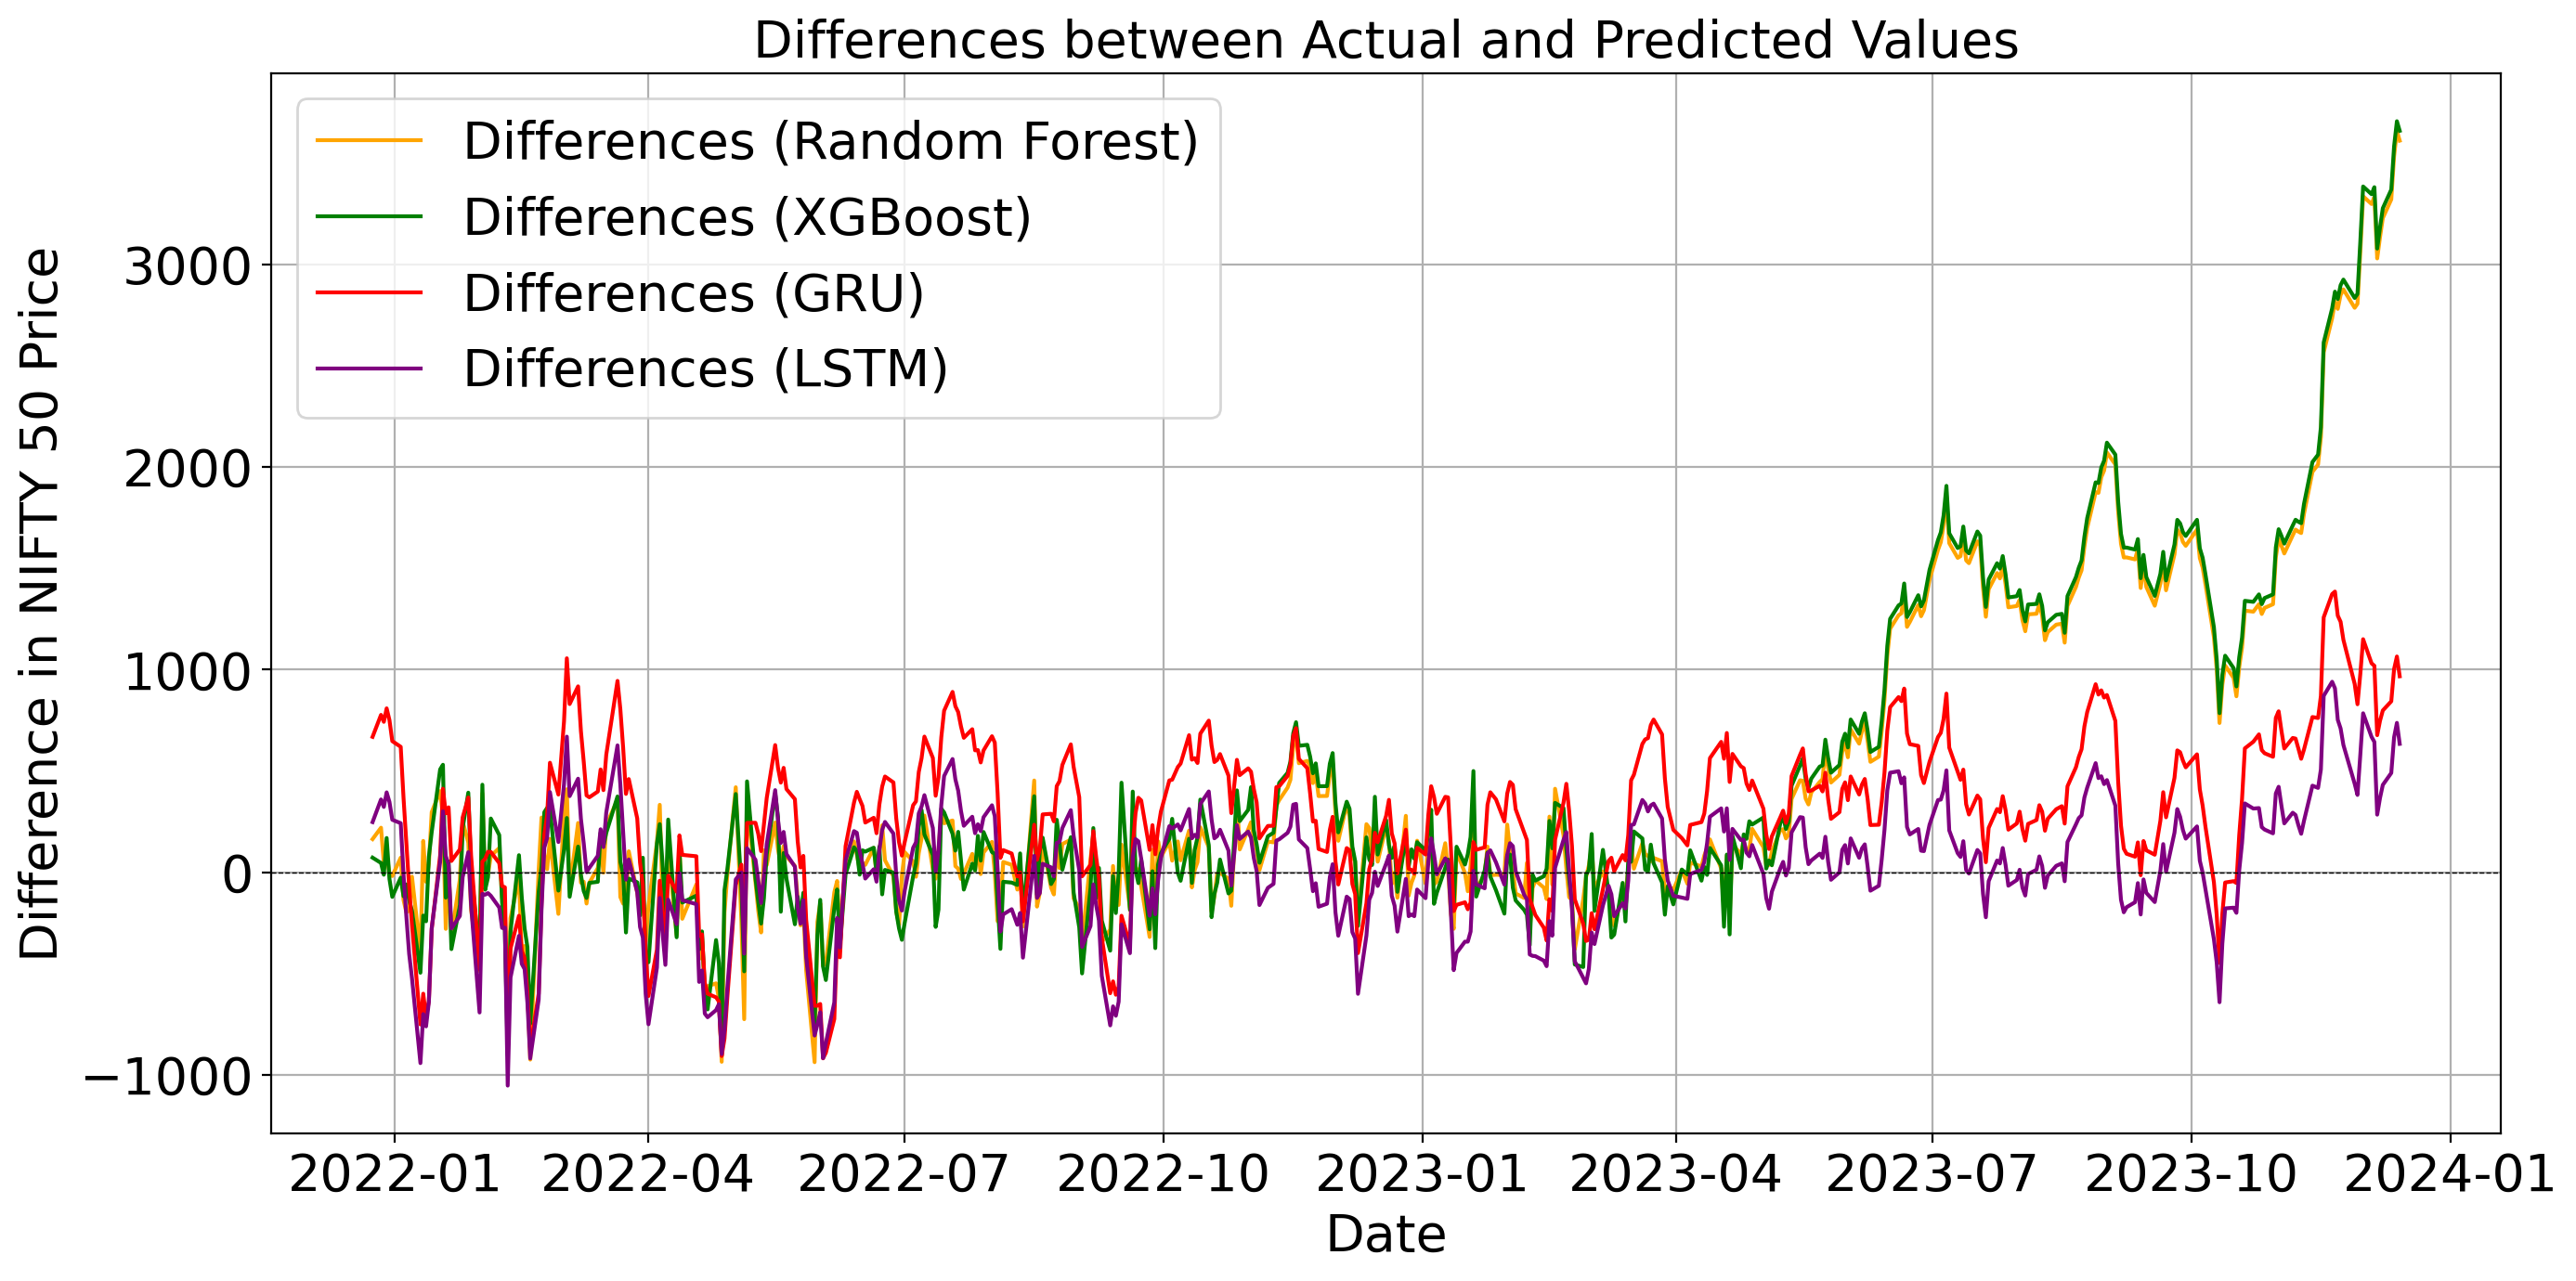

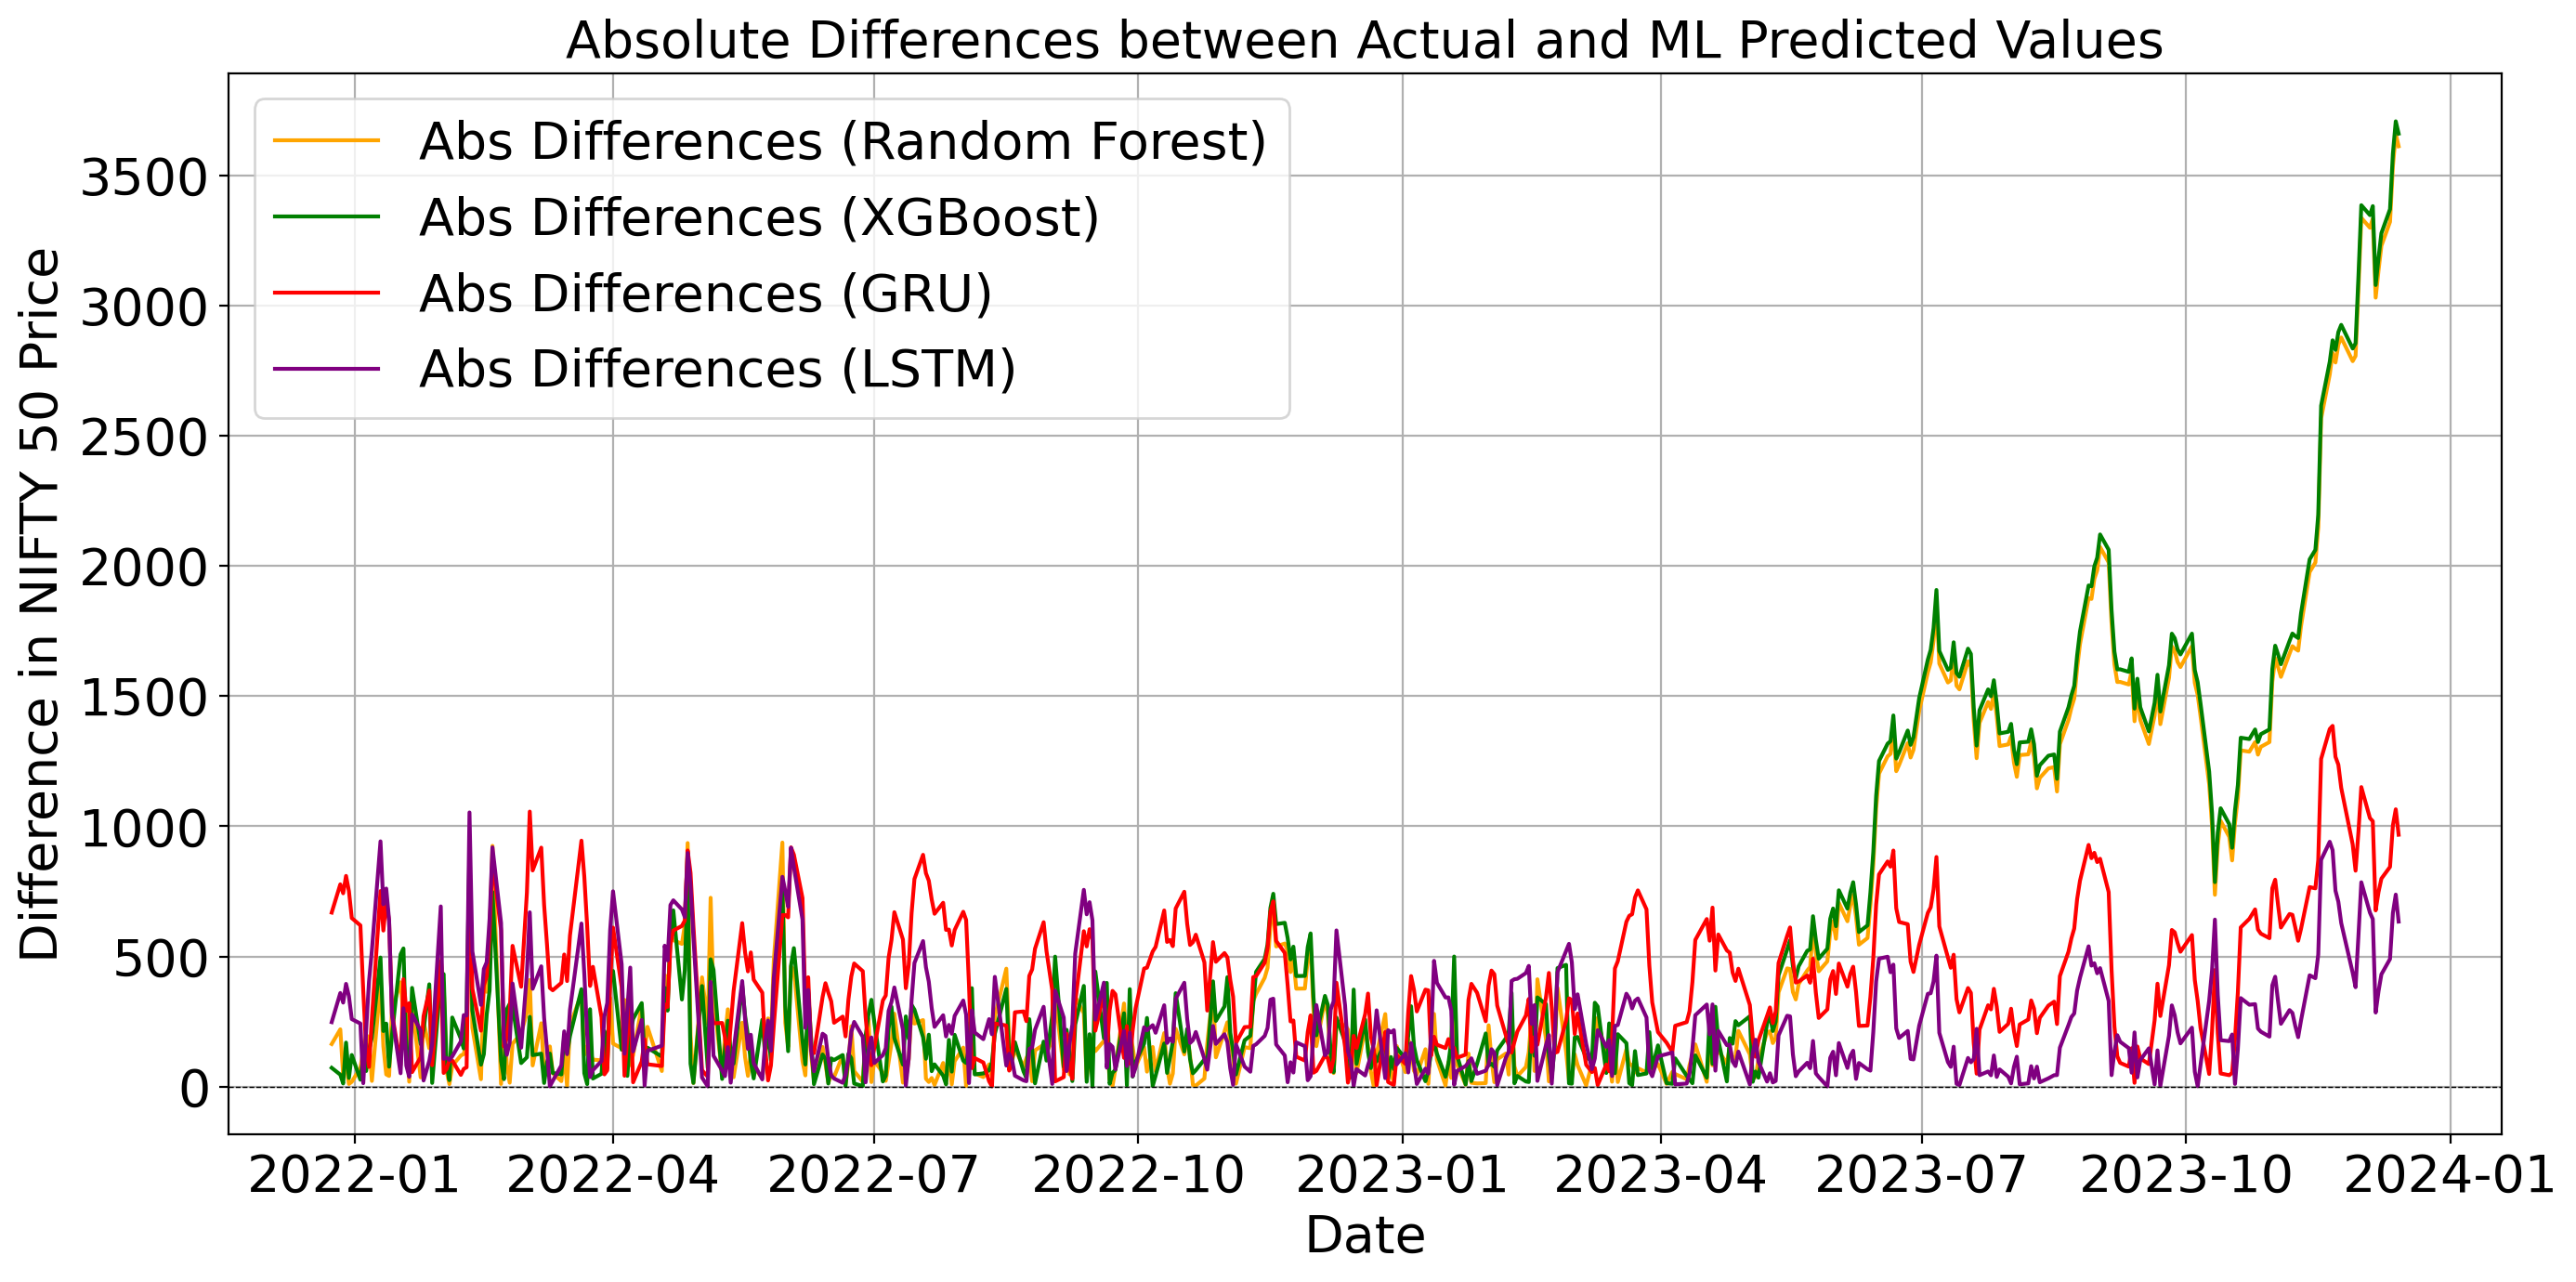

In [13]:
# Visualization of Predictions vs Actual Values
plt.figure(figsize=(14, 7), dpi=200)
plt.plot(data.index[:train_size], y_train.values.flatten(), label='Train Data', color='#5aabcb')
plt.plot(data.index[train_size:train_size + len(y_test)], y_test.values.flatten(), label='Test Data', color='blue')
plt.plot(data.index[train_size:train_size + len(rf_predictions)], rf_predictions.flatten(), label='Random Forest Predictions', color='orange')
plt.plot(data.index[train_size:train_size + len(xgb_predictions)], xgb_predictions.flatten(), label='XGBoost Predictions', color='green')
plt.plot(data.index[train_size:train_size + len(gru_predictions)], gru_predictions.flatten(), label='GRU Predictions', color='red')
plt.plot(data.index[train_size:train_size + len(lstm_predictions)], lstm_predictions.flatten(), label='LSTM Predictions', color='purple')
plt.title('NIFTY 50 Price Forecasting: Train Data, Test Data vs Model Predictions', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('NIFTY 50 Price', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)  # Set tick label font size
plt.grid()
plt.tight_layout()
plt.savefig('NIFTY_50_Price_Forecasting.pdf') # Save the plot as PDF


# Step 4: Create separate plots for predictions and differences

# Plotting Test Data with Predictions and saving it as PDF
plt.figure(figsize=(14 ,7), dpi=200)
plt.plot(test.index , test.values , label='Actual Test Data' , color='blue')
plt.plot(data.index[train_size:train_size + len(rf_predictions.flatten())] , rf_predictions.flatten() , label='Random Forest Predictions' , color='orange')
plt.plot(data.index[train_size:train_size + len(xgb_predictions.flatten())] , xgb_predictions.flatten() , label='XGBoost Predictions' , color='green')
plt.plot(data.index[train_size:train_size + len(gru_predictions.flatten())] , gru_predictions.flatten() , label='GRU Predictions' , color='red')
plt.plot(data.index[train_size:train_size + len(lstm_predictions.flatten())] , lstm_predictions.flatten() , label='LSTM Predictions' , color='purple')

plt.title('Test Data vs ML Predictions', fontsize=20, )
plt.xlabel('Date', fontsize=20)
plt.ylabel('NIFTY 50 Price', fontsize=20)
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)  # Set tick label font size
plt.grid()
plt.tight_layout()
plt.savefig('test_data_vs_ML_predictions.pdf') # Save the plot as PDF file


# Plotting Differences between Actual and Predicted Values and saving it as PDF

# Calculate differences for each model's predictions
differences_rf = y_test.values.flatten() - rf_predictions.flatten()
differences_xgb = y_test.values.flatten() - xgb_predictions.flatten()
differences_gru = y_test.values.flatten() - gru_predictions.flatten()
differences_lstm = y_test.values.flatten() - lstm_predictions.flatten()

# Plotting differences for each ML model's predictions
plt.figure(figsize=(14, 7), dpi=200)
plt.plot(data.index[train_size:train_size + len(differences_rf)], differences_rf,
         label='Differences (Random Forest)', color='orange')
plt.plot(data.index[train_size:train_size + len(differences_xgb)], differences_xgb,
         label='Differences (XGBoost)', color='green')
plt.plot(data.index[train_size:train_size + len(differences_gru)], differences_gru,
         label='Differences (GRU)', color='red')
plt.plot(data.index[train_size:train_size + len(differences_lstm)], differences_lstm,
         label='Differences (LSTM)', color='purple')

plt.title('Differences between Actual and Predicted Values', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Difference in NIFTY 50 Price', fontsize=20)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)  # Set tick label font size
plt.grid()
plt.tight_layout()
plt.savefig('Differences_actual_and_ML_predicted.pdf')


# Plotting Absolute Differences between Actual and Predicted Values and saving it as PDF

# Calculate absolute differences for each model's predictions
abs_differences_rf = np.abs(y_test.values.flatten() - rf_predictions.flatten())
abs_differences_xgb = np.abs(y_test.values.flatten() - xgb_predictions.flatten())
abs_differences_gru = np.abs(y_test.values.flatten() - gru_predictions.flatten())
abs_differences_lstm = np.abs(y_test.values.flatten() - lstm_predictions.flatten())

# Plotting differences for each ML model's predictions
plt.figure(figsize=(14, 7), dpi=200)
plt.plot(data.index[train_size:train_size + len(abs_differences_rf)], abs_differences_rf,
         label='Abs Differences (Random Forest)', color='orange')
plt.plot(data.index[train_size:train_size + len(abs_differences_xgb)], abs_differences_xgb,
         label='Abs Differences (XGBoost)', color='green')
plt.plot(data.index[train_size:train_size + len(abs_differences_gru)], abs_differences_gru,
         label='Abs Differences (GRU)', color='red')
plt.plot(data.index[train_size:train_size + len(abs_differences_lstm)], abs_differences_lstm,
         label='Abs Differences (LSTM)', color='purple')

plt.title('Absolute Differences between Actual and ML Predicted Values', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Difference in NIFTY 50 Price', fontsize=20)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)  # Set tick label font size
plt.grid()
plt.tight_layout()
plt.savefig('Absolute_differences_actual_and_ML_predicted.pdf')

In [ ]:
# Visualization of Predictions vs Actual Values
plt.figure(figsize=(14, 7), dpi=200)
plt.plot(data.index[:train_size], y_train.values.flatten(), label='Train Data', color='#5aabcb')
plt.plot(data.index[train_size:train_size + len(y_test)], y_test.values.flatten(), label='Test Data', color='blue')
plt.plot(data.index[train_size:train_size + len(rf_predictions)], rf_predictions.flatten(), label='Random Forest Predictions', color='orange')
plt.plot(data.index[train_size:train_size + len(xgb_predictions)], xgb_predictions.flatten(), label='XGBoost Predictions', color='green')
plt.plot(data.index[train_size:train_size + len(gru_predictions)], gru_predictions.flatten(), label='GRU Predictions', color='red')
plt.plot(data.index[train_size:train_size + len(lstm_predictions)], lstm_predictions.flatten(), label='LSTM Predictions', color='purple')
plt.title('NIFTY 50 Price Forecasting: Train Data, Test Data vs Model Predictions', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('NIFTY 50 Price', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)  # Set tick label font size
plt.grid()
plt.tight_layout()
plt.savefig('NIFTY_50_Price_Forecasting.pdf') # Save the plot as PDF


# Step 4: Create separate plots for predictions and differences

# Plotting Test Data with Predictions and saving it as PDF
plt.figure(figsize=(14 ,7), dpi=200)
plt.plot(y_test.index , y_test.values , label='Actual Test Data' , color='blue')
plt.plot(data.index[train_size:train_size + len(rf_predictions.flatten())] , rf_predictions.flatten() , label='Random Forest Predictions' , color='orange')
plt.plot(data.index[train_size:train_size + len(xgb_predictions.flatten())] , xgb_predictions.flatten() , label='XGBoost Predictions' , color='green')
plt.plot(data.index[train_size:train_size + len(gru_predictions.flatten())] , gru_predictions.flatten() , label='GRU Predictions' , color='red')
plt.plot(data.index[train_size:train_size + len(lstm_predictions.flatten())] , lstm_predictions.flatten() , label='LSTM Predictions' , color='purple')

plt.title('Test Data vs ML Predictions', fontsize=20, )
plt.xlabel('Date', fontsize=20)
plt.ylabel('NIFTY 50 Price', fontsize=20)
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)  # Set tick label font size
plt.grid()
plt.tight_layout()
plt.savefig('test_data_vs_ML_predictions.pdf') # Save the plot as PDF file


# Plotting Differences between Actual and Predicted Values and saving it as PDF

# Calculate differences for each model's predictions
differences_rf = y_test.values.flatten() - rf_predictions.flatten()
differences_xgb = y_test.values.flatten() - xgb_predictions.flatten()
differences_gru = y_test.values.flatten() - gru_predictions.flatten()
differences_lstm = y_test.values.flatten() - lstm_predictions.flatten()

# Plotting differences for each ML model's predictions
plt.figure(figsize=(14, 7), dpi=200)
plt.plot(data.index[train_size:train_size + len(differences_rf)], differences_rf,
         label='Differences (Random Forest)', color='orange')
plt.plot(data.index[train_size:train_size + len(differences_xgb)], differences_xgb,
         label='Differences (XGBoost)', color='green')
plt.plot(data.index[train_size:train_size + len(differences_gru)], differences_gru,
         label='Differences (GRU)', color='red')
plt.plot(data.index[train_size:train_size + len(differences_lstm)], differences_lstm,
         label='Differences (LSTM)', color='purple')

plt.title('Differences between Actual and Predicted Values', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Difference in NIFTY 50 Price', fontsize=20)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)  # Set tick label font size
plt.grid()
plt.tight_layout()
plt.savefig('Differences_actual_and_ML_predicted.pdf')


# Plotting Absolute Differences between Actual and Predicted Values and saving it as PDF

# Calculate absolute differences for each model's predictions
abs_differences_rf = np.abs(y_test.values.flatten() - rf_predictions.flatten())
abs_differences_xgb = np.abs(y_test.values.flatten() - xgb_predictions.flatten())
abs_differences_gru = np.abs(y_test.values.flatten() - gru_predictions.flatten())
abs_differences_lstm = np.abs(y_test.values.flatten() - lstm_predictions.flatten())

# Plotting differences for each ML model's predictions
plt.figure(figsize=(14, 7), dpi=200)
plt.plot(data.index[train_size:train_size + len(abs_differences_rf)], abs_differences_rf,
         label='Abs Differences (Random Forest)', color='orange')
plt.plot(data.index[train_size:train_size + len(abs_differences_xgb)], abs_differences_xgb,
         label='Abs Differences (XGBoost)', color='green')
plt.plot(data.index[train_size:train_size + len(abs_differences_gru)], abs_differences_gru,
         label='Abs Differences (GRU)', color='red')
plt.plot(data.index[train_size:train_size + len(abs_differences_lstm)], abs_differences_lstm,
         label='Abs Differences (LSTM)', color='purple')

plt.title('Absolute Differences between Actual and ML Predicted Values', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Difference in NIFTY 50 Price', fontsize=20)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)  # Set tick label font size
plt.grid()
plt.tight_layout()
plt.savefig('Absolute_differences_actual_and_ML_predicted.pdf')

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import random
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import random


# Step 1: Import stock data
ticker = "^NSEI"
data1 = yf.download(ticker, start="2014-01-01", end="2024-01-01")
data = data1.copy()
column_names = [col[0] for col in data1.columns]
data.columns = column_names

data['Return'] = data['Close'].pct_change()
data.dropna(inplace=True)

"""# Step 2: Prepare the dataset
def create_supervised_data(series, lag=1):
    series = series.squeeze()
    df = pd.DataFrame({'t': series.values}, index=series.index)
    for i in range(1, lag + 1):
        df[f't-{i}'] = series.shift(i).values
    return df.dropna()"""

# Step 2: Feature Engineering
def create_supervised_data(data, lag=10):
    df = pd.DataFrame(data['Close'])
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = data['Close'].shift(i)
    df['rolling_mean'] = data['Close'].rolling(window=lag).mean()
    df['rolling_std'] = data['Close'].rolling(window=lag).std()
    df['momentum'] = data['Close'] - data['Close'].shift(lag)
    df['volatility'] = data['Return'].rolling(window=lag).std()
    return df.dropna()

lag = 10  # Increase lag for more context
supervised_data = create_supervised_data(data, lag)
X, y = supervised_data.drop(columns=['Close']), supervised_data['Close']

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Reshaping for LSTM/GRU
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Step 3: Fine-Tuning and Model Training
ML_model_metrics = {}

"""# Random Forest
rf_param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}"""

# Random Forest
rf_param_grid = {
    'n_estimators': [100, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 4, 5, 6, 7],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]
}

rf_model = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, scoring='neg_mean_squared_error', cv=3)
rf_model.fit(X_train, y_train)
rf_best_model = rf_model.best_estimator_

# Measure only the time required to train on the best hyperparameters
start_time = time.time()
rf_best_model.fit(X_train, y_train)
rf_train_time = time.time() - start_time

rf_predictions = rf_best_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
ML_model_metrics['Random Forest'] = {'MSE': rf_mse, 'RMSE': rf_rmse, 'Best Params': rf_model.best_params_, 'Time (s)': rf_train_time}

"""# XGBoost
xgb_param_grid = {
    'n_estimators': [100, 180, 185, 190, 195, 200, 210],
    'learning_rate': [0.2, 0.25, 0.3, 0.35, 0.4],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.8, 0.85, 0.9, 0.95, 1.0]
}"""

"""# XGBoost
xgb_param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.2],
    'max_depth': [3],
    'subsample': [0.8]
}

xgb_model = GridSearchCV(XGBRegressor(random_state=42), xgb_param_grid, scoring='neg_mean_squared_error', cv=3)
xgb_model.fit(X_train, y_train)
xgb_best_model = xgb_model.best_estimator_"""

# Define pipeline
pipeline = Pipeline([('xgb', XGBRegressor())])

"""# Define grid search parameters
xgb_param_grid = {
    'xgb__n_estimators': [50, 100],
    'xgb__learning_rate': [0.1, 0.2],
    'xgb__max_depth': [3, 5],
    'xgb__subsample': [0.8, 1.0],
}"""

xgb_param_grid = {
    'xgb__n_estimators': [100, 180, 185, 190, 195, 200, 210],
    'xgb__learning_rate': [0.2, 0.25, 0.3, 0.35, 0.4],
    'xgb__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'xgb__subsample': [0.8, 0.85, 0.9, 0.95, 1.0]
}


# Perform grid search
grid_search = GridSearchCV(pipeline, xgb_param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
xgb_best_model = grid_search.best_estimator_

# Predictions
# y_pred = best_model.predict(X_test)


start_time = time.time()
xgb_best_model.fit(X_train, y_train)
xgb_train_time = time.time() - start_time

xgb_predictions = xgb_best_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
ML_model_metrics['XGBoost'] = {'MSE': xgb_mse, 'RMSE': xgb_rmse, 'Best Params': grid_search.best_params_, 'Time (s)': xgb_train_time} # Access best_params_ from grid_search
#ML_model_metrics['XGBoost'] = {'MSE': xgb_mse, 'RMSE': xgb_rmse, 'Best Params': xgb_best_model.best_params_, 'Time (s)': xgb_train_time}

# GRU
gru_model = Sequential([
    GRU(50, input_shape=(lag, 1), return_sequences=True),
    Dropout(0.2),
    GRU(50, return_sequences=False),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

start_time = time.time()
gru_model.fit(X_train_reshaped, y_train_scaled, validation_split=0.1, epochs=50, batch_size=32, verbose=1,
              callbacks=[early_stopping])
gru_train_time = time.time() - start_time

gru_predictions_scaled = gru_model.predict(X_test_reshaped).flatten()
gru_predictions = scaler_y.inverse_transform(gru_predictions_scaled.reshape(-1, 1)).flatten()
gru_mse = mean_squared_error(y_test, gru_predictions)
gru_rmse = np.sqrt(gru_mse)
ML_model_metrics['GRU'] = {'MSE': gru_mse, 'RMSE': gru_rmse, 'Time (s)': gru_train_time}

# LSTM

# Set random seeds
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Ensure deterministic operations in TensorFlow
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# Define fine-tuned LSTM model
lstm_model = Sequential([
    LSTM(64, input_shape=(lag, 1), return_sequences=True, activation='tanh', kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(64, return_sequences=False, activation='tanh', kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model with a fine-tuned optimizer and loss function
lstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Add callbacks for better training control
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=1)

# Train the model with fine-tuned parameters
start_time = time.time()
history = lstm_model.fit(
    X_train_reshaped, y_train_scaled,
    validation_split=0.1,
    epochs=100,  # Increased epochs for more training
    batch_size=64,  # Adjusted batch size for better generalization
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)
lstm_train_time = time.time() - start_time

# Make predictions
lstm_predictions_scaled = lstm_model.predict(X_test_reshaped).flatten()
lstm_predictions = scaler_y.inverse_transform(lstm_predictions_scaled.reshape(-1, 1)).flatten()

# Evaluate metrics
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)

# Store metrics
ML_model_metrics['LSTM'] = {'MSE': lstm_mse, 'RMSE': lstm_rmse, 'Time (s)': lstm_train_time}

"""# Set random seeds
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Ensure deterministic operations in TensorFlow
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# Define LSTM model
lstm_model = Sequential([
    LSTM(50, input_shape=(lag, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

# Add EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
start_time = time.time()
lstm_model.fit(
    X_train_reshaped, y_train_scaled,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)
lstm_train_time = time.time() - start_time

# Make predictions
lstm_predictions_scaled = lstm_model.predict(X_test_reshaped).flatten()
lstm_predictions = scaler_y.inverse_transform(lstm_predictions_scaled.reshape(-1, 1)).flatten()

# Evaluate metrics
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)

# Store metrics
ML_model_metrics['LSTM'] = {'MSE': lstm_mse, 'RMSE': lstm_rmse, 'Time (s)': lstm_train_time}"""

"""lstm_model = Sequential([
    LSTM(50, input_shape=(lag, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

start_time = time.time()
lstm_model.fit(X_train_reshaped, y_train_scaled, validation_split=0.1, epochs=50,
               batch_size=32, verbose=1,
               callbacks=[early_stopping])
lstm_train_time = time.time() - start_time

lstm_predictions_scaled = lstm_model.predict(X_test_reshaped).flatten()
lstm_predictions = scaler_y.inverse_transform(lstm_predictions_scaled.reshape(-1, 1)).flatten()
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
ML_model_metrics['LSTM'] = {'MSE': lstm_mse, 'RMSE': lstm_rmse, 'Time (s)': lstm_train_time}"""

# Step 4: Save Metrics and Results
metrics_ML_df = pd.DataFrame(ML_model_metrics).T
metrics_ML_df.to_csv('Timed_ML_model_metrics_fine_tuned.csv', index=True)

print("Model metrics (excluding hyperparameter tuning time) saved to 'Timed_ML_model_metrics_fine_tuned.csv'")

# Save predictions in a DataFrame with the corresponding time
predictions_df = pd.DataFrame({
    'Time': X_test.index,  # Assuming X_test.index contains the time information
    'Actual': y_test,
    'Random Forest': rf_predictions,
    'XGBoost': xgb_predictions,
    'GRU': gru_predictions,
    'LSTM': lstm_predictions
})

# Save predictions to a CSV file
predictions_df.to_csv('Model_Predictions.csv', index=False)
print("Predictions saved to 'Model_Predictions.csv'")

In [ ]:
# Visualization of Predictions vs Actual Values
plt.figure(figsize=(14, 7), dpi=200)
plt.plot(data.index[:train_size], y_train.values.flatten(), label='Train Data', color='#5aabcb')
plt.plot(data.index[train_size:train_size + len(y_test)], y_test.values.flatten(), label='Test Data', color='blue')
plt.plot(data.index[train_size:train_size + len(rf_predictions)], rf_predictions.flatten(), label='Random Forest Predictions', color='orange')
plt.plot(data.index[train_size:train_size + len(xgb_predictions)], xgb_predictions.flatten(), label='XGBoost Predictions', color='green')
plt.plot(data.index[train_size:train_size + len(gru_predictions)], gru_predictions.flatten(), label='GRU Predictions', color='red')
plt.plot(data.index[train_size:train_size + len(lstm_predictions)], lstm_predictions.flatten(), label='LSTM Predictions', color='purple')
plt.title('NIFTY 50 Price Forecasting: Train Data, Test Data vs Model Predictions', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('NIFTY 50 Price', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)  # Set tick label font size
plt.grid()
plt.tight_layout()
plt.savefig('NIFTY_50_Price_Forecasting.pdf') # Save the plot as PDF


# Step 4: Create separate plots for predictions and differences

# Plotting Test Data with Predictions and saving it as PDF
plt.figure(figsize=(14 ,7), dpi=200)
plt.plot(y_test.index , y_test.values , label='Actual Test Data' , color='blue')
plt.plot(data.index[train_size:train_size + len(rf_predictions.flatten())] , rf_predictions.flatten() , label='Random Forest Predictions' , color='orange')
plt.plot(data.index[train_size:train_size + len(xgb_predictions.flatten())] , xgb_predictions.flatten() , label='XGBoost Predictions' , color='green')
plt.plot(data.index[train_size:train_size + len(gru_predictions.flatten())] , gru_predictions.flatten() , label='GRU Predictions' , color='red')
plt.plot(data.index[train_size:train_size + len(lstm_predictions.flatten())] , lstm_predictions.flatten() , label='LSTM Predictions' , color='purple')

plt.title('Test Data vs ML Predictions', fontsize=20, )
plt.xlabel('Date', fontsize=20)
plt.ylabel('NIFTY 50 Price', fontsize=20)
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)  # Set tick label font size
plt.grid()
plt.tight_layout()
plt.savefig('test_data_vs_ML_predictions.pdf') # Save the plot as PDF file


# Plotting Differences between Actual and Predicted Values and saving it as PDF

# Calculate differences for each model's predictions
differences_rf = y_test.values.flatten() - rf_predictions.flatten()
differences_xgb = y_test.values.flatten() - xgb_predictions.flatten()
differences_gru = y_test.values.flatten() - gru_predictions.flatten()
differences_lstm = y_test.values.flatten() - lstm_predictions.flatten()

# Plotting differences for each ML model's predictions
plt.figure(figsize=(14, 7), dpi=200)
plt.plot(data.index[train_size:train_size + len(differences_rf)], differences_rf,
         label='Differences (Random Forest)', color='orange')
plt.plot(data.index[train_size:train_size + len(differences_xgb)], differences_xgb,
         label='Differences (XGBoost)', color='green')
plt.plot(data.index[train_size:train_size + len(differences_gru)], differences_gru,
         label='Differences (GRU)', color='red')
plt.plot(data.index[train_size:train_size + len(differences_lstm)], differences_lstm,
         label='Differences (LSTM)', color='purple')

plt.title('Differences between Actual and Predicted Values', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Difference in NIFTY 50 Price', fontsize=20)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)  # Set tick label font size
plt.grid()
plt.tight_layout()
plt.savefig('Differences_actual_and_ML_predicted.pdf')


# Plotting Absolute Differences between Actual and Predicted Values and saving it as PDF

# Calculate absolute differences for each model's predictions
abs_differences_rf = np.abs(y_test.values.flatten() - rf_predictions.flatten())
abs_differences_xgb = np.abs(y_test.values.flatten() - xgb_predictions.flatten())
abs_differences_gru = np.abs(y_test.values.flatten() - gru_predictions.flatten())
abs_differences_lstm = np.abs(y_test.values.flatten() - lstm_predictions.flatten())

# Plotting differences for each ML model's predictions
plt.figure(figsize=(14, 7), dpi=200)
plt.plot(data.index[train_size:train_size + len(abs_differences_rf)], abs_differences_rf,
         label='Abs Differences (Random Forest)', color='orange')
plt.plot(data.index[train_size:train_size + len(abs_differences_xgb)], abs_differences_xgb,
         label='Abs Differences (XGBoost)', color='green')
plt.plot(data.index[train_size:train_size + len(abs_differences_gru)], abs_differences_gru,
         label='Abs Differences (GRU)', color='red')
plt.plot(data.index[train_size:train_size + len(abs_differences_lstm)], abs_differences_lstm,
         label='Abs Differences (LSTM)', color='purple')

plt.title('Absolute Differences between Actual and ML Predicted Values', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Difference in NIFTY 50 Price', fontsize=20)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)  # Set tick label font size
plt.grid()
plt.tight_layout()
plt.savefig('Absolute_differences_actual_and_ML_predicted.pdf')